In [1]:
#Would repeat for other cell type

#Paths in /ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Astro
#/ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Astro/240_predictions_MatrixStacked.tsv
#/ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Astro/240_predictions_NamesList.txt

In [1]:
#Install libraries needed downstream

#dir.create("~/R/library", recursive = TRUE)  # Create the directory if it doesn't exist
#.libPaths("~/R/library")  # Set the library path
install.packages("ape")  # Now install the package
install.packages("BiocManager")
install.packages("phylolm");
BiocManager::install("ggtree")
BiocManager::install("phyloseq")



The downloaded binary packages are in
	/var/folders/l1/n0lxnfv545s7861hzrvj1zy40000gn/T//RtmpbmZ3Ee/downloaded_packages

The downloaded binary packages are in
	/var/folders/l1/n0lxnfv545s7861hzrvj1zy40000gn/T//RtmpbmZ3Ee/downloaded_packages

The downloaded binary packages are in
	/var/folders/l1/n0lxnfv545s7861hzrvj1zy40000gn/T//RtmpbmZ3Ee/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggtree'"
Old packages: 'MASS', 'Matrix', 'Rcpp', 'RcppArmadillo', 'boot', 'curl',
  'foreign', 'fs', 'future.apply', 'gtable', 'nlme', 'parallelly', 'survival',
  'withr', 'yulab.utils'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'phyloseq'"
Old packages

In [2]:
library(ape)
library(ggtree)
library(phyloseq)
library(phylolm)
library(ggplot2)
library(dplyr)
library(reshape2)

ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56

Guangchuang Yu.  Data Integration, Manipulation and Visualization of
Phylogenetic Trees (1st edition). Chapman and Hall/CRC. 2022,
doi:10.1201/9781003279242 


Attaching package: 'ggtree'


The following object is masked from 'package:ape':

    rotate



Attaching package: 'dplyr'


The following object is

Step 1: Download and Read in Data

In [3]:
astrocytePredictionsPath <- "/Users/MaxS/Desktop/geb_proj/240_predictions_MatrixStacked_astro.tsv"
astrocytePredictions <- read.delim(astrocytePredictionsPath, header = FALSE, sep = "\t")
astrocytePredictionsNamesPath <- "/Users/MaxS/Desktop/geb_proj/240_predictions_names_list_astro.txt"
astrocytePredictionsNames <- read.delim(astrocytePredictionsNamesPath, header = FALSE, sep = "\t")

In [4]:
vipPredictionsPath <- "/Users/MaxS/Desktop/geb_proj/240_predictions_MatrixStacked_vip.tsv"
vipPredictions <- read.delim(vipPredictionsPath, header = FALSE, sep = "\t")
vipPredictionsNamesPath <- "/Users/MaxS/Desktop/geb_proj/240_predictions_names_list_vip.txt"
vipPredictionsNames <- read.delim(vipPredictionsNamesPath, header = FALSE, sep = "\t")

In [5]:
# Extract the species names from astrocytePredictionsNames and make them column names
species_names <- astrocytePredictionsNames[[1]]

# Check if the length matches the number of columns (excluding the first)
if (length(species_names) == (ncol(astrocytePredictions) - 1)) {

  # Rename the columns in astrocytePredictions (excluding the first column)
  colnames(astrocytePredictions)[2:ncol(astrocytePredictions)] <- species_names
  colnames(vipPredictions)[2:ncol(vipPredictions)] <- species_names

  # Print the new column names to verify
  #print(colnames(astrocytePredictions))
} else {
  stop("The number of species names does not match the number of columns in astrocytePredictions.")
}


In [6]:
# Transpose the astrocytePredictions data frame so species are rows and peaks are columns
astrocytePredictions <- t(astrocytePredictions)

# Convert it back to a data frame
astrocytePredictions <- as.data.frame(astrocytePredictions)

#Fix it so peaks are actually the column names
colnames(astrocytePredictions) <- astrocytePredictions[1, ]
astrocytePredictions <- astrocytePredictions[-1, ]

In [7]:
# Transpose the astrocytePredictions data frame so species are rows and peaks are columns
vipPredictions <- t(vipPredictions)

# Convert it back to a data frame
vipPredictions <- as.data.frame(vipPredictions)

#Fix it so peaks are actually the column names
colnames(vipPredictions) <- vipPredictions[1, ]
vipPredictions <- vipPredictions[-1, ]

In [8]:
common_columns <- intersect(names(astrocytePredictions), names(vipPredictions))
length(common_columns)

#If we just want common columns
#astrocytePredictions <- astrocytePredictions[, common_columns, drop = FALSE]
#vipPredictions <- vipPredictions[, common_columns, drop = FALSE]

[1] 689

##### Processing: Remove the extra species from astrocytePredictions and astrocytePredictionsNames compared to Zoonomia data
##### Then, add column to astrocytePredictionsNames that has binary Homeotherm value.

In [9]:
#Load in original data to subset it --> added csv file to home directory of bridges ~___
#originalZoonomiaData <- read.csv("Phenotypes_Zoonomia_3.csv", header = TRUE)
originalZoonomiaData <- read.csv("/Users/MaxS/Desktop/geb_proj/Phenotypes_Zoonomia_3.csv", header = TRUE)

sortedZoonomia <- originalZoonomiaData[order(originalZoonomiaData$Name), ]

#Remove rows where Homeotherm value is NA
sortedZoonomia <- sortedZoonomia[!is.na(sortedZoonomia$Homeotherm), ]

# Step 1: Get the species names from sortedZoonomia
zoonomia_species <- sortedZoonomia$Name

In [10]:
astrocytePredictions <- astrocytePredictions[rownames(astrocytePredictions) %in% zoonomia_species, ]
astrocytePredictionsNames <- astrocytePredictionsNames[astrocytePredictionsNames$V1 %in% zoonomia_species, ]

#Need to convert the names back into a df
astrocytePredictionsNames <- data.frame(Species = astrocytePredictionsNames, stringsAsFactors = FALSE)

#Add homeotherm column
astrocytePredictionsNames$Homeotherm <- sortedZoonomia$Homeotherm

vipPredictions <- vipPredictions[rownames(vipPredictions) %in% zoonomia_species, ]
vipPredictionsNames <- vipPredictionsNames[vipPredictionsNames$V1 %in% zoonomia_species, ]

#Need to convert the names back into a df
vipPredictionsNames <- data.frame(Species = vipPredictionsNames, stringsAsFactors = FALSE)

#Add homeotherm column
vipPredictionsNames$Homeotherm <- sortedZoonomia$Homeotherm


2: Calculate difference in open chromatin between/across species of choice

Total number of species in the original tree: 241 
Number of species in the pruned tree: 163 


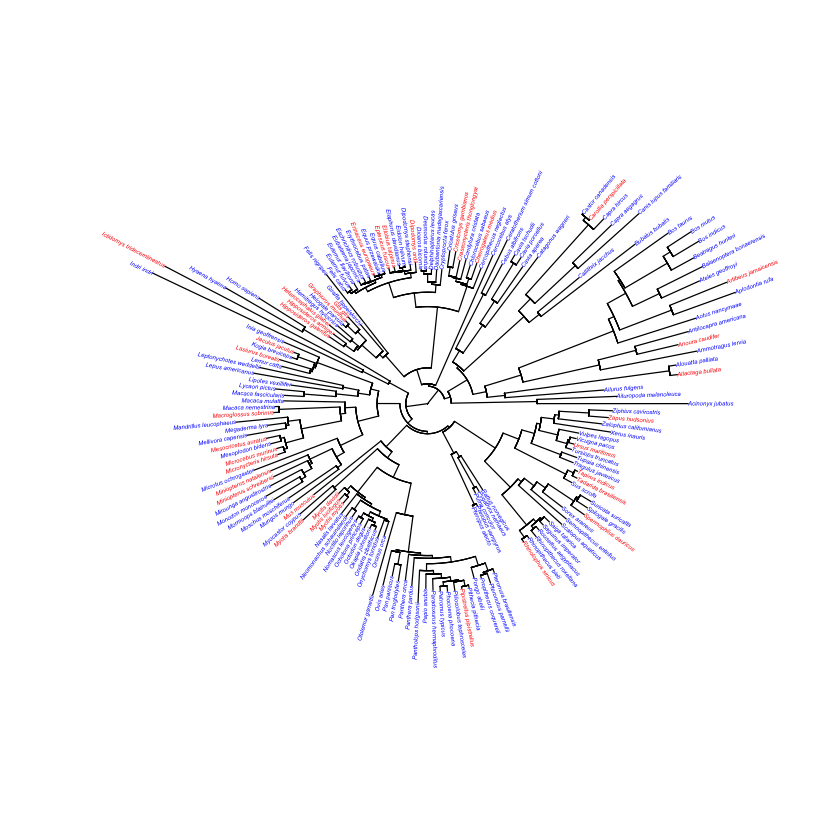

In [11]:
# Tree info - added tree file to ~ path

# Read the tree
#tree <- read.tree("Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")
tree <- read.tree("/Users/MaxS/Desktop/geb_proj/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")


total_species <- length(tree$tip.label)
cat("Total number of species in the original tree:", total_species, "\n")

# Read the phenotypes data
pheno_df <- read.csv("/Users/MaxS/Desktop/geb_proj/Phenotypes_Zoonomia_3.csv")

# Create a subset of pheno_df to include only species with Homeotherm values
pheno_df_subset <- pheno_df[!is.na(pheno_df$Homeotherm), c("Homeotherm", "Species")]
rownames(pheno_df_subset) <- pheno_df_subset$Species
pheno_df_subset$Homeotherm <- factor(pheno_df_subset$Homeotherm)

# Trim whitespace from species names
tree$tip.label <- trimws(tree$tip.label)
pheno_df_subset$Species <- trimws(pheno_df_subset$Species)

# Identify species in pheno_df_subset that are not in the tree
species_not_in_tree <- setdiff(pheno_df_subset$Species, tree$tip.label)

# Remove species not present in the tree
remove_species <- setdiff(tree$tip.label, pheno_df_subset$Species)
pruned_tree <- drop.tip(tree, remove_species)
pruned_tree$tip.label <- sort(pruned_tree$tip.label)


# Print the number of species in the pruned tree
num_species_pruned <- length(pruned_tree$tip.label)
cat("Number of species in the pruned tree:", num_species_pruned, "\n")

# Prepare tip colors based on Homeotherm factor
useTipColorsV <- c("red", "blue")
tipColorsV <- useTipColorsV[pheno_df_subset[pruned_tree$tip.label, "Homeotherm"]]

# Plot the pruned tree
plot(pruned_tree, type = "fan", cex = 0.3, tip.color = tipColorsV)


In [12]:
vector_to_remove <- c('Balaenoptera_acutorostrata', 'Bison_bison', 'Cebus_capucinus', 'Colobus_angolensis', 'Dicerorhinus_sumatrensis', 'Equus_asinus',
                     'Gorilla_gorilla', 'Marmota_marmota', 'Neophocaena_asiaeorientalis', 'Oryctolagus_cuniculus', 'Ovis_canadensis', 'Panthera_tigris',
                     'Perognathus_longimembris', 'Peromyscus_maniculatus', 'Saimiri_boliviensis')


In [13]:
astrocytePredictionsNames = astrocytePredictionsNames[-(which(astrocytePredictionsNames$Species %in% vector_to_remove)),]
astrocytePredictions = astrocytePredictions[-(which(rownames(astrocytePredictions) %in% vector_to_remove)),]

In [14]:
vipPredictionsNames = vipPredictionsNames[-(which(vipPredictionsNames$Species %in% vector_to_remove)),]
vipPredictions = vipPredictions[-(which(rownames(vipPredictions) %in% vector_to_remove)),]

In [15]:
table(vipPredictionsNames$Homeotherm)



  0   1 
 37 126 

In [16]:
table(astrocytePredictionsNames$Homeotherm)



  0   1 
 37 126 

In [16]:
head(vipPredictionsNames)

,Species,Homeotherm
,<chr>,<int>
1,Acinonyx_jubatus,1
2,Ailuropoda_melanoleuca,1
3,Ailurus_fulgens,1
4,Allactaga_bullata,0
5,Alouatta_palliata,1
6,Ammotragus_lervia,1


In [17]:
#dim(vipPredictions)
head(vipPredictions)

,hg38:chr1:826803-827304,hg38:chr1:1019286-1019787,hg38:chr1:4656218-4656719,hg38:chr1:45014394-45014895,hg38:chr5:133910500-133911001,hg38:chr5:133952865-133953366,hg38:chr5:133968405-133968906,hg38:chr5:134004250-134004751,hg38:chr5:134004805-134005306,hg38:chr5:134039478-134039979,...,mm10:chr7:139233590-139234091,mm10:chr7:139234854-139235355,mm10:chr7:139275722-139276223,mm10:chr7:139364184-139364685,mm10:chr7:139545304-139545805,mm10:chr1:160792664-160793165,mm10:chr7:139833914-139834415,mm10:chr7:139835202-139835703,mm10:chr7:139835710-139836211,mm10:chr7:139850166-139850667
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Acinonyx_jubatus,-1.00000000,-1.00000000,-1.00000000,0.32694100,0.84588200,0.52362400,-1.00000000,-1.00000000,-1.00000000,0.50406700,...,-1.00000000,-1.00000000,-1.00000000,0.09001530,0.44824800,0.92643500,0.49071200,-1.00000000,-1.00000000,0.44401300
Ailuropoda_melanoleuca,-1.00000000,0.81603700,0.94618500,0.72976400,0.92310600,0.74395700,-1.00000000,-1.00000000,0.63657200,0.89298800,...,-1.00000000,-1.00000000,-1.00000000,0.28066300,0.77706300,0.90678800,-1.00000000,0.93799700,-1.00000000,0.72813600
Ailurus_fulgens,-1.00000000,0.92673700,0.86743500,0.83376100,0.92851800,0.92372300,-1.00000000,-1.00000000,0.88972900,0.93056500,...,-1.00000000,-1.00000000,-1.00000000,0.23831300,0.55269400,0.89488500,-1.00000000,0.14173400,-1.00000000,0.89591400
Allactaga_bullata,-1.00000000,0.92807800,0.64116400,0.91167600,0.15355800,-1.00000000,-1.00000000,0.81029600,0.37813900,0.85868700,...,0.93482900,0.83861300,-1.00000000,0.90782200,0.89941500,0.87888100,0.10359100,0.95821700,0.72584200,0.93156200
Alouatta_palliata,0.53602700,0.94913100,0.94065900,0.39754800,0.87119800,0.64775200,0.85501700,0.94462200,0.17245700,0.62761000,...,0.89981600,-1.00000000,0.96423000,0.90311700,0.95100400,0.73577300,0.92370400,0.90764200,0.91997400,0.94476400
Ammotragus_lervia,-1.0000000,0.8023200,0.9232600,0.9258360,-1.0000000,-1.0000000,0.1527530,-1.0000000,0.8396860,0.8632130,...,-1.0000000,-1.0000000,-1.0000000,0.8983870,0.5219080,0.9475910,0.9358370,0.8790610,-1.0000000,-1.0000000


In [18]:

#hg38:chr11:76799177-76799678 pos astro human
#hg38:chr12:55720933-55721434 neg astro human
#hg38:chr5:54446336-54446837 pos vip human
#hg38:chr15:64095689-64096190 neg vip human


#mm10:chr13:3633772-3634273 pos astro mouse
#mm10:chr7:112684857-112685358 neg astro mouse
#mm10:chr4:126309721-126310222 pos vip mouse
#mm10:chr2:131159889-131160390 neg vip mouse




In [19]:
# Ensure rownames are available as a column in vipPredictions
vipPredictions$Species <- rownames(vipPredictions)


In [20]:
astrocytePredictions$Species <- rownames(astrocytePredictions)

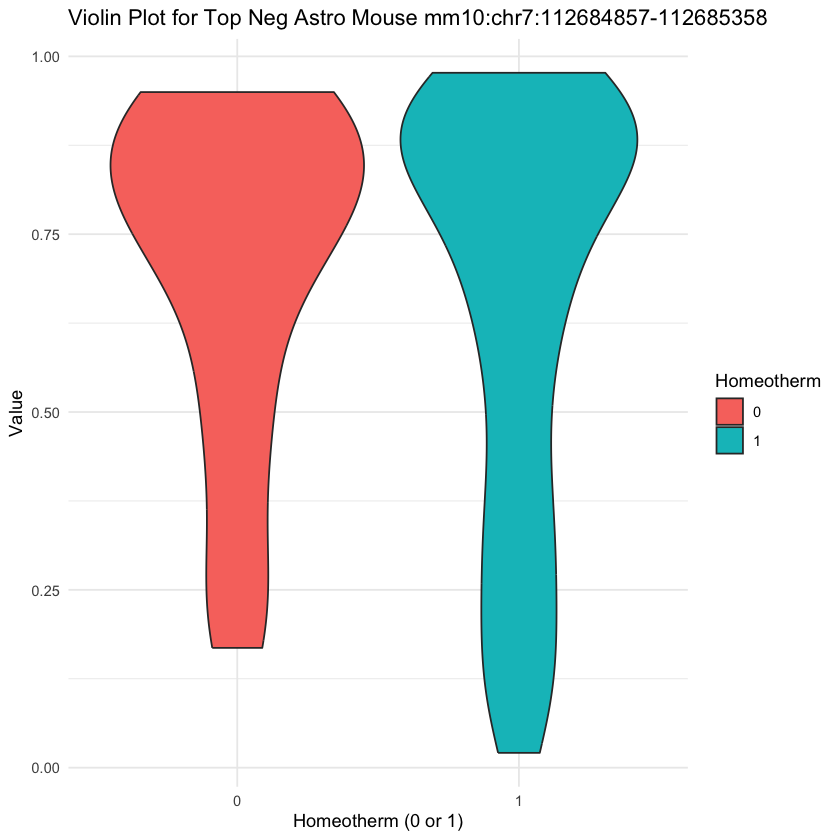

In [32]:
# Merge astroPredictions with astroPredictionsNames based on the 'Species' column
merged_df <- merge(astrocytePredictions, astrocytePredictionsNames, by = "Species")

# Extract the data for the specific peak region and the Homeotherm column
peak_region <- "mm10:chr7:112684857-112685358"
plot_data <- data.frame(
  Value = merged_df[[peak_region]],
  Homeotherm = as.factor(merged_df$Homeotherm)
)

plot_data$Value <- as.numeric(plot_data$Value)

# Remove samples where Value is below 0 or NA
plot_data <- subset(plot_data, !is.na(Value) & Value >= 0)

# Create the violin plot using ggplot2
ggplot(plot_data, aes(x = Homeotherm, y = Value, fill = Homeotherm)) +
  geom_violin() +
  labs(
    title = paste("Violin Plot for Top Neg Astro Mouse", peak_region),
    x = "Homeotherm (0 or 1)",
    y = "Value"
  ) +
  theme_minimal()


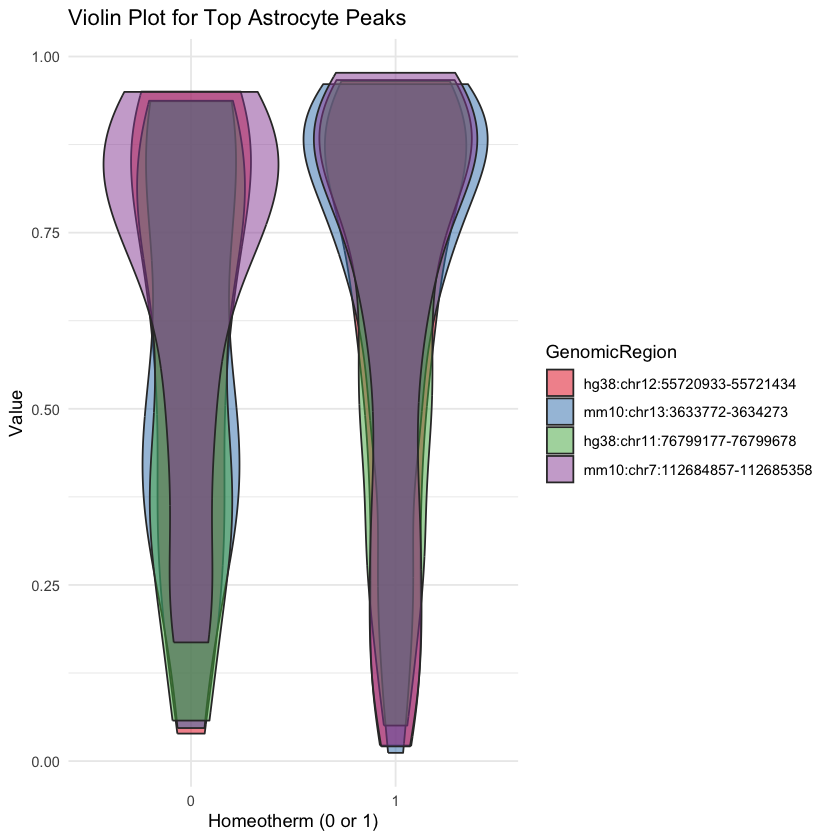

In [24]:
merged_df <- merge(astrocytePredictions, astrocytePredictionsNames, by = "Species")


# List of specific genomic region names
peak_regions <- c("hg38:chr12:55720933-55721434", "mm10:chr13:3633772-3634273",
                  "hg38:chr11:76799177-76799678", "mm10:chr7:112684857-112685358")

# Reshape the data to long format, combining the four genomic regions
plot_data <- melt(merged_df, id.vars = "Homeotherm", measure.vars = peak_regions,
                  variable.name = "GenomicRegion", value.name = "Value")

# Ensure the 'Value' column is numeric
plot_data$Value <- as.numeric(plot_data$Value)

# Remove samples where Value is below 0 or NA
plot_data <- subset(plot_data, !is.na(Value) & Value >= 0)

# Create the violin plot with separated Homeotherm values and overlayed violins
ggplot(plot_data, aes(x = factor(Homeotherm), y = Value, fill = GenomicRegion)) +
  geom_violin(alpha = 0.5, position = position_identity()) +  # Overlay violins and add transparency
  labs(
    title = "Violin Plot for Top Astrocyte Peaks",
    x = "Homeotherm (0 or 1)",
    y = "Value"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")  # You can choose different color palettes if needed

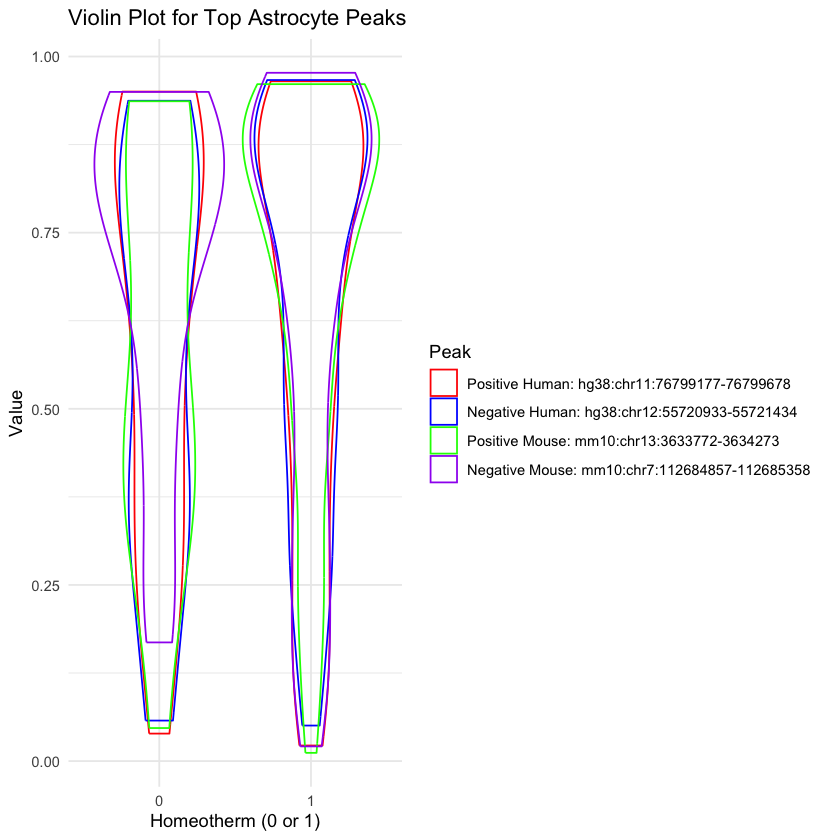

In [26]:

merged_df <- merge(astrocytePredictions, astrocytePredictionsNames, by = "Species")
peak_regions = c("hg38:chr12:55720933-55721434", "hg38:chr11:76799177-76799678",
"mm10:chr13:3633772-3634273", "mm10:chr7:112684857-112685358")

#peak_regions = c("hg38:chr12:55720933-55721434", "mm10:chr13:3633772-3634273",
#          "hg38:chr11:76799177-76799678", "mm10:chr7:112684857-112685358")
          
# Reshape the data to long format, combining the four genomic regions
plot_data <- melt(merged_df, id.vars = "Homeotherm", measure.vars = peak_regions,
                  variable.name = "Peak", value.name = "Value")

# Ensure the 'Value' column is numeric
plot_data$Value <- as.numeric(plot_data$Value)

# Remove samples where Value is below 0 or NA
plot_data <- subset(plot_data, !is.na(Value) & Value >= 0)

# Create the violin plot with separated Homeotherm values and overlayed violins
ggplot(plot_data, aes(x = factor(Homeotherm), y = Value, color = Peak)) +
  geom_violin(fill = NA, alpha = 0.5, position = position_identity()) +  # Use color for outline and no fill
  labs(
    title = "Violin Plot for Top Astrocyte Peaks",
    x = "Homeotherm (0 or 1)",
    y = "Value"
  ) +
  scale_color_manual(
    values = c("red", "blue", "green", "purple"),  # Custom outline colors for each region
    labels = c(
      "Positive Human: hg38:chr11:76799177-76799678",
      "Negative Human: hg38:chr12:55720933-55721434",
      "Positive Mouse: mm10:chr13:3633772-3634273",
      "Negative Mouse: mm10:chr7:112684857-112685358"
    )
  ) +
  theme_minimal()

#labels = c(
#      "Neg Human: hg38:chr12:55720933-55721434",
#      "Pos Mouse: mm10:chr13:3633772-3634273",
#      "Pos Human: hg38:chr11:76799177-76799678",
#      "Neg Mouse: mm10:chr7:112684857-112685358"
#    )


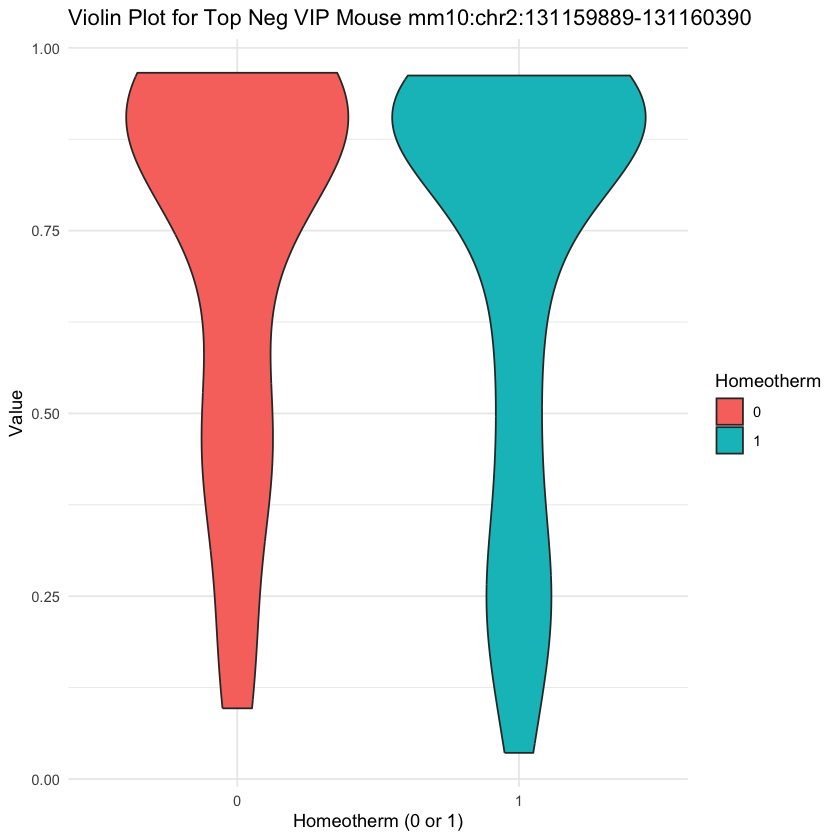

In [29]:
# Merge vipPredictions with vipPredictionsNames based on the 'Species' column
merged_df <- merge(vipPredictions, vipPredictionsNames, by = "Species")

# Extract the data for the specific peak region and the Homeotherm column
peak_region <- "mm10:chr2:131159889-131160390"
plot_data <- data.frame(
  Value = merged_df[[peak_region]],
  Homeotherm = as.factor(merged_df$Homeotherm)
)

plot_data$Value <- as.numeric(plot_data$Value)

# Remove samples where Value is below 0 or NA
plot_data <- subset(plot_data, !is.na(Value) & Value >= 0)

# Create the violin plot using ggplot2
ggplot(plot_data, aes(x = Homeotherm, y = Value, fill = Homeotherm)) +
  geom_violin() +
  labs(
    title = paste("Violin Plot for Top Neg VIP Mouse", peak_region),
    x = "Homeotherm (0 or 1)",
    y = "Value"
  ) +
  theme_minimal()


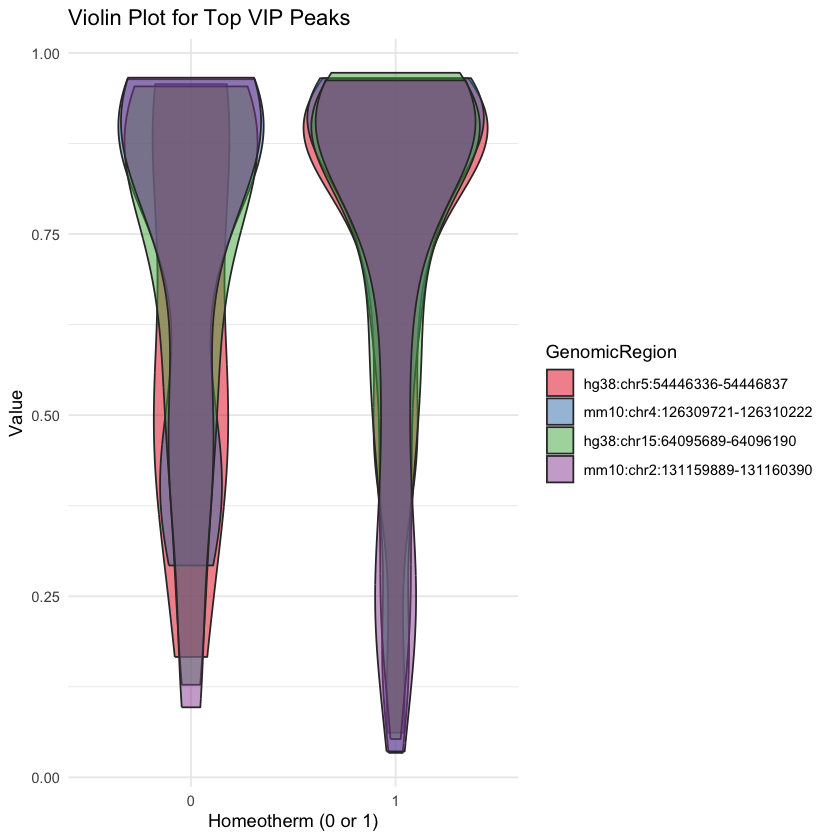

In [27]:
merged_df <- merge(vipPredictions, vipPredictionsNames, by = "Species")


# List of specific genomic region names
peak_regions <- c("hg38:chr5:54446336-54446837", "mm10:chr4:126309721-126310222",
                  "hg38:chr15:64095689-64096190", "mm10:chr2:131159889-131160390")

# Reshape the data to long format, combining the four genomic regions
plot_data <- melt(merged_df, id.vars = "Homeotherm", measure.vars = peak_regions,
                  variable.name = "GenomicRegion", value.name = "Value")

# Ensure the 'Value' column is numeric
plot_data$Value <- as.numeric(plot_data$Value)

# Remove samples where Value is below 0 or NA
plot_data <- subset(plot_data, !is.na(Value) & Value >= 0)

# Create the violin plot with separated Homeotherm values and overlayed violins
ggplot(plot_data, aes(x = factor(Homeotherm), y = Value, fill = GenomicRegion)) +
  geom_violin(alpha = 0.5, position = position_identity()) +  # Overlay violins and add transparency
  labs(
    title = "Violin Plot for Top VIP Peaks",
    x = "Homeotherm (0 or 1)",
    y = "Value"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")  # You can choose different color palettes if needed

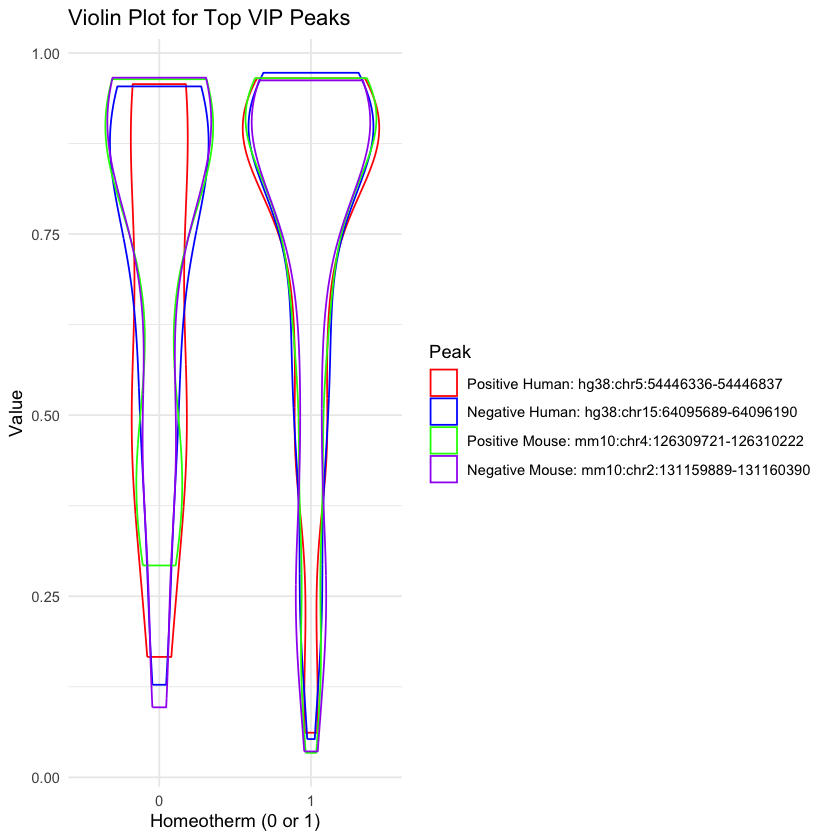

In [28]:

merged_df <- merge(vipPredictions, vipPredictionsNames, by = "Species")
peak_regions <- c("hg38:chr5:54446336-54446837", "hg38:chr15:64095689-64096190",
"mm10:chr4:126309721-126310222", "mm10:chr2:131159889-131160390")
          
# Reshape the data to long format, combining the four genomic regions
plot_data <- melt(merged_df, id.vars = "Homeotherm", measure.vars = peak_regions,
                  variable.name = "Peak", value.name = "Value")

# Ensure the 'Value' column is numeric
plot_data$Value <- as.numeric(plot_data$Value)

# Remove samples where Value is below 0 or NA
plot_data <- subset(plot_data, !is.na(Value) & Value >= 0)

# Create the violin plot with separated Homeotherm values and overlayed violins
ggplot(plot_data, aes(x = factor(Homeotherm), y = Value, color = Peak)) +
  geom_violin(fill = NA, alpha = 0.5, position = position_identity()) +  # Use color for outline and no fill
  labs(
    title = "Violin Plot for Top VIP Peaks",
    x = "Homeotherm (0 or 1)",
    y = "Value"
  ) +
  scale_color_manual(
    values = c("red", "blue", "green", "purple"),  # Custom outline colors for each region
    labels = c(
      "Positive Human: hg38:chr5:54446336-54446837",
      "Negative Human: hg38:chr15:64095689-64096190",
      "Positive Mouse: mm10:chr4:126309721-126310222",
      "Negative Mouse: mm10:chr2:131159889-131160390"
    )
  ) +
  theme_minimal()


**Phylolm**

In [ ]:
#CLEAN THIS UP/UPDATE AT END

# testPeaksV <- colnames(astrocytePredictions)

# loopPeaksV <- testPeaksV[1:689]

# peakPhyloResultsF <- data.frame(peakId = loopPeaksV, pvalue=rep(NA,length(loopPeaksV)),correlation=rep(NA,length(loopPeaksV)),adjCorrelation=rep(NA,length(loopPeaksV)))
# rownames(peakPhyloResultsF) <- peakPhyloResultsF$peakId
# options(warn=-1)
# for(curPeak in loopPeaksV) {
#     speciesDetailedInfoTmpF <- astrocytePredictionsNames
#     matching_order <- match(pruned_tree$tip.label, speciesDetailedInfoTmpF$Species)

#     speciesDetailedInfoTmpF <- speciesDetailedInfoTmpF[matching_order, ]
#     astrocytePredictions <- astrocytePredictions[matching_order, ]

#     speciesDetailedInfoTmpF$curPeak <- astrocytePredictions[, curPeak]
#     speciesDetailedInfoTmpF$curPeak <- as.numeric(speciesDetailedInfoTmpF$curPeak)


#     rownames(speciesDetailedInfoTmpF) <- NULL
#     rownames(speciesDetailedInfoTmpF) = speciesDetailedInfoTmpF$Species

#     # Perform the phylogenetic regression
#     curLmFit = phylolm(curPeak ~ Homeotherm, data=speciesDetailedInfoTmpF, phy=pruned_tree, model="BM")
#     curLmFitSum <- summary(curLmFit)

#     peakPhyloResultsF[curPeak, "pvalue"] <- curLmFitSum$coefficients["Homeotherm", "p.value"]
#     peakPhyloResultsF[curPeak, "correlation"] <- curLmFitSum$r.squared
#     peakPhyloResultsF[curPeak, "adjCorrelation"] <- curLmFitSum$adj.r.squared
# }
# options(warn=0)
# file_name <- sprintf("Peak_Phylolm/peakPhyloResults_astrocyte.csv", start_index, slice_indices[i])
# write.csv(peakPhyloResultsF, file = file_name, row.names = FALSE)
# flush.console()
# Sys.sleep(1)



ERROR: Error in phylolm(curPeak ~ Homeotherm, data = speciesDetailedInfoTmpF, : could not find function "phylolm"


**Visualization**

In [ ]:
# astrocyte_10000 <- read.csv("Peak_Phylolm/peakPhyloResults_astrocyte.csv")
# astrocyte_overlap <- read.csv("Peak_Phylolm/peakPhyloResults_astrocyte_common.csv")
# vip_10000 <- read.csv("Peak_Phylolm/peakPhyloResults_vip.csv")
# vip_overlap <- read.csv("Peak_Phylolm/peakPhyloResults_vip_common.csv")

In [17]:
#/Users/MaxS/Desktop/geb_proj/peakPhyloResults_astrocyte_human.csv
astrocyte_human <- read.csv("/Users/MaxS/Desktop/geb_proj/peakPhyloResults_astrocyte_human_new.csv")
astrocyte_mouse <- read.csv("/Users/MaxS/Desktop/geb_proj/peakPhyloResults_astrocyte_mouse_new.csv")
vip_human <- read.csv("/Users/MaxS/Desktop/geb_proj/peakPhyloResults_vip_human_new.csv")
vip_mouse <- read.csv("/Users/MaxS/Desktop/geb_proj/peakPhyloResults_vip_mouse_new.csv")

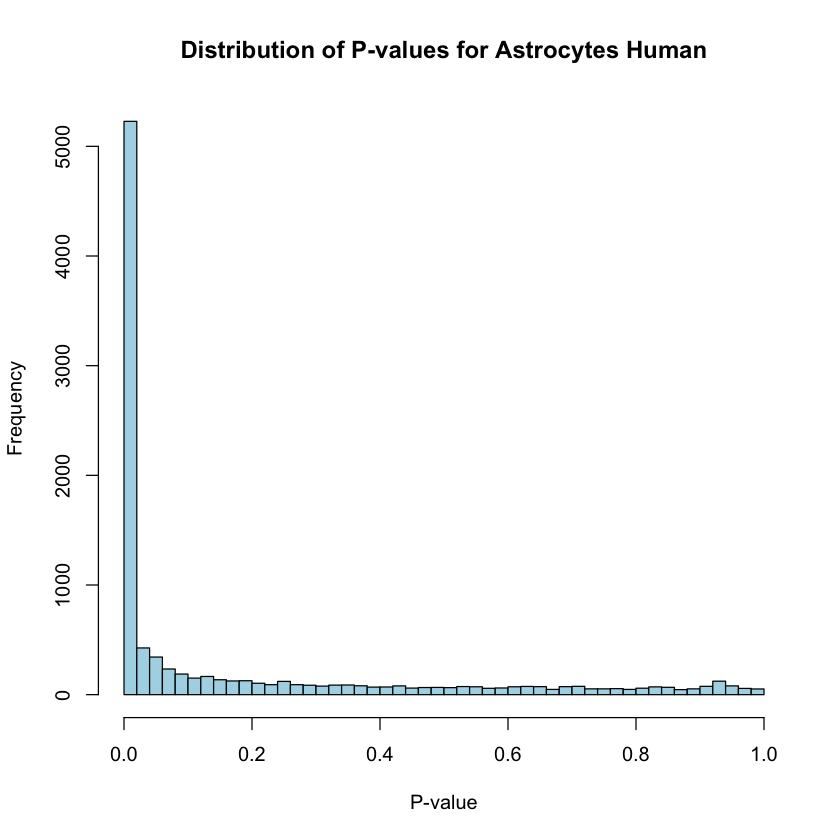

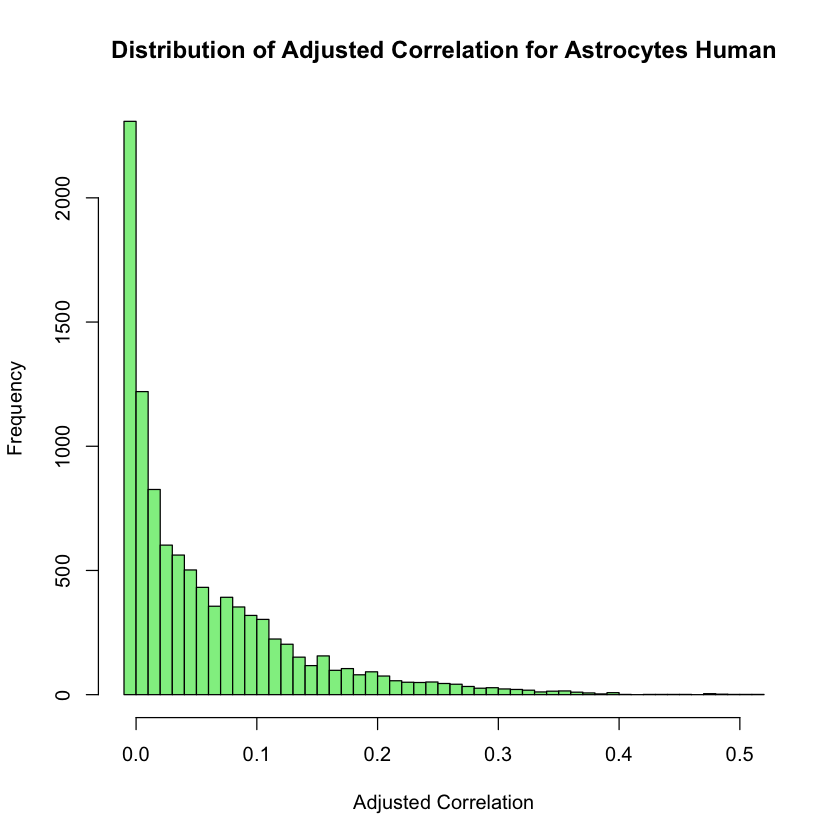

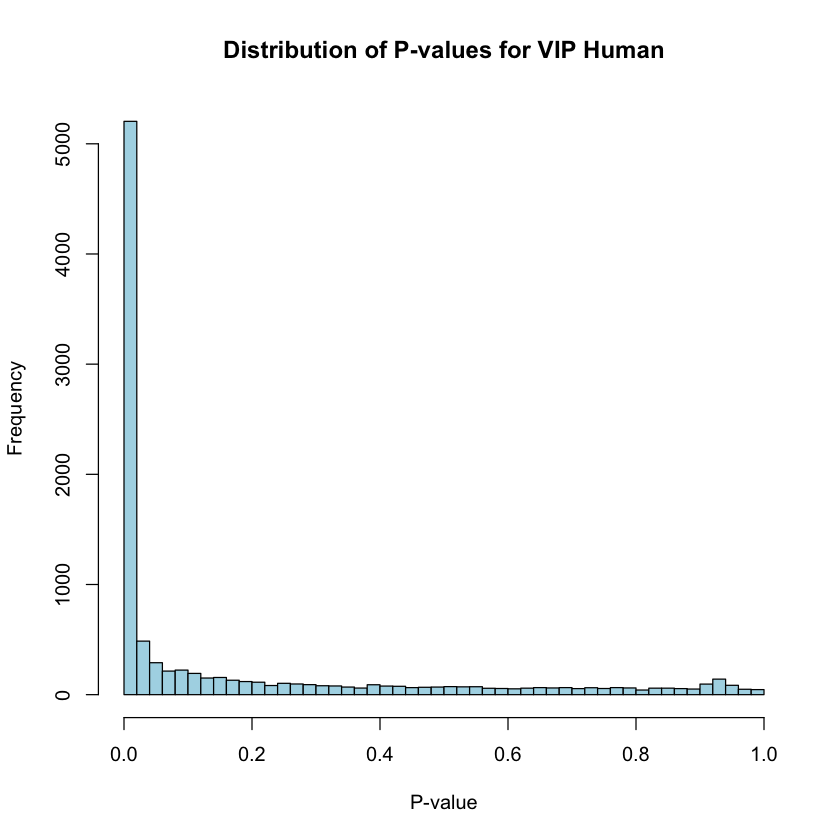

Significantly positively associated regions Astrocyte Human: 5996 
Significantly negatively associated regions Astrocyte Human: 0 
Significantly positively associated regions VIP Human: 5980 
Significantly negatively associated regions VIP Human: 0 
[1] "Most positively associated peak Astrocyte Human:"
                           peakId       pvalue correlation adjCorrelation
2082 hg38:chr11:76799177-76799678 3.680453e-27   0.5160442      0.5130383
     adjusted_pvalue
2082    3.680453e-23
[1] "Most negatively associated peak Astrocyte Human:"
                           peakId    pvalue correlation adjCorrelation
5419 hg38:chr12:55720933-55721434 0.3193642 0.006158789  -1.413823e-05
     adjusted_pvalue
5419       0.4151003
[1] "Most positively associated peak VIP Human:"
                          peakId      pvalue correlation adjCorrelation
8224 hg38:chr5:54446336-54446837 2.66056e-23   0.4599406      0.4565861
     adjusted_pvalue
8224    2.229077e-19
[1] "Most negatively associated

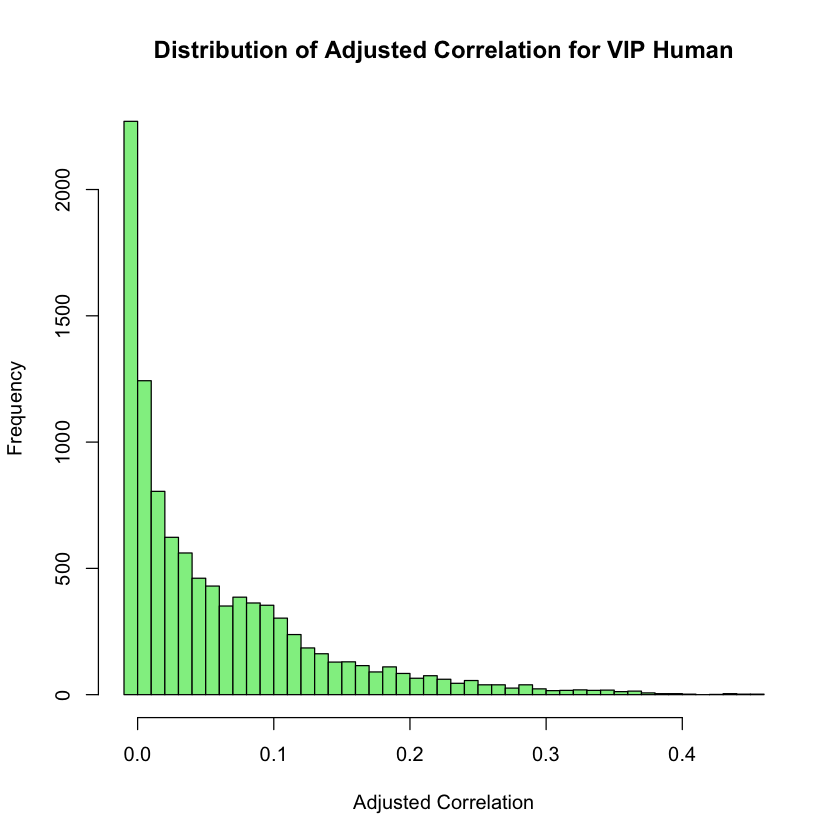

In [18]:
#Working on human peaks

#Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# P-value Histogram
hist(astrocyte_human$pvalue, breaks=50, main="Distribution of P-values for Astrocytes Human", xlab="P-value", col="lightblue")

# Adjusted Correlation Histogram
hist(astrocyte_human$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for Astrocytes Human", xlab="Adjusted Correlation", col="lightgreen")

#Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# P-value Histogram
hist(vip_human$pvalue, breaks=50, main="Distribution of P-values for VIP Human", xlab="P-value", col="lightblue")

# Adjusted Correlation Histogram
hist(vip_human$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for VIP Human", xlab="Adjusted Correlation", col="lightgreen")

astrocyte_human$adjusted_pvalue <- p.adjust(astrocyte_human$pvalue, method = "BH")

# Count significant regions at adjusted p-value <= 0.1
sig_pos <- sum(astrocyte_human$adjusted_pvalue <= 0.1 & astrocyte_human$adjCorrelation > 0)
sig_neg <- sum(astrocyte_human$adjusted_pvalue <= 0.1 & astrocyte_human$adjCorrelation < 0)

cat("Significantly positively associated regions Astrocyte Human:", sig_pos, "\n")
cat("Significantly negatively associated regions Astrocyte Human:", sig_neg, "\n")

#Performing p-value correction for multiple hypotheses

# Apply FDR correction - Bonferroni
vip_human$adjusted_pvalue <- p.adjust(vip_human$pvalue, method = "BH")

# Count significant regions at adjusted p-value <= 0.1
sig_pos <- sum(vip_human$adjusted_pvalue <= 0.1 & vip_human$adjCorrelation > 0)
sig_neg <- sum(vip_human$adjusted_pvalue <= 0.1 & vip_human$adjCorrelation < 0)

cat("Significantly positively associated regions VIP Human:", sig_pos, "\n")
cat("Significantly negatively associated regions VIP Human:", sig_neg, "\n")


# Filter the rows where adjCorrelation is positive and negative
positive_adj_corr <- astrocyte_human[astrocyte_human$adjCorrelation > 0, ]
negative_adj_corr <- astrocyte_human[astrocyte_human$adjCorrelation < 0, ]

# Find the row with the lowest p-value among the positive adjCorrelation
most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# Find the row with the lowest p-value among the negative adjCorrelation
most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# Print the results
print("Most positively associated peak Astrocyte Human:")
print(most_pos_assoc_peak)

print("Most negatively associated peak Astrocyte Human:")
print(most_neg_assoc_peak)


# Filter the rows where adjCorrelation is positive and negative
positive_adj_corr <- vip_human[vip_human$adjCorrelation > 0, ]
negative_adj_corr <- vip_human[vip_human$adjCorrelation < 0, ]

# Find the row with the lowest p-value among the positive adjCorrelation
most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# Find the row with the lowest p-value among the negative adjCorrelation
most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# Print the results
print("Most positively associated peak VIP Human:")
print(most_pos_assoc_peak)

print("Most negatively associated peak VIP Human:")
print(most_neg_assoc_peak)

#GREAT ANALYSIS
top_200_positiveAstro <- astrocyte_human[astrocyte_human$adjCorrelation > 0, ][order(astrocyte_human$pvalue[astrocyte_human$adjCorrelation > 0]), ][1:200, ]
top_200_negativeAstro <- astrocyte_human[astrocyte_human$adjCorrelation < 0, ][order(astrocyte_human$pvalue[astrocyte_human$adjCorrelation < 0]), ][1:200, ]

extract_bed_info <- function(peakId) {
  split_info <- strsplit(peakId, ":|-")[[1]] # Split by : and -
  chr <- split_info[2]   # Chromosome
  start <- split_info[3] # Start position
  stop <- split_info[4]  # End position
  return(c(chr, start, stop))
}

# Apply this function to both positive and negative data
top_200_positive_bedAstro <- t(apply(top_200_positiveAstro, 1, function(x) extract_bed_info(x['peakId'])))
top_200_negative_bedAstro <- t(apply(top_200_negativeAstro, 1, function(x) extract_bed_info(x['peakId'])))

# Add peakId to the BED information
top_200_positive_bedAstro <- data.frame(top_200_positive_bedAstro, peakId = top_200_positiveAstro$peakId)
top_200_negative_bedAstro <- data.frame(top_200_negative_bedAstro, peakId = top_200_negativeAstro$peakId)

# Rename the columns to match BED format
colnames(top_200_positive_bedAstro) <- c("chr", "start", "stop", "peakId")
colnames(top_200_negative_bedAstro) <- c("chr", "start", "stop", "peakId")

# Write to BED files
write.table(top_200_positive_bedAstro, file = "bed_results/human/top_200_positive_peaks_astro_human.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

write.table(top_200_negative_bedAstro, file = "bed_results/human/top_200_negative_peaks_astro_human.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# Extract all peaks
all_peaks_bedAstro <- t(apply(astrocyte_human, 1, function(x) extract_bed_info(x['peakId'])))
all_peaks_bedAstro <- data.frame(all_peaks_bedAstro, peakId = astrocyte_human$peakId)

# Rename columns for BED format
colnames(all_peaks_bedAstro) <- c("chr", "start", "stop", "peakId")

# Write to a BED file for all peaks
write.table(all_peaks_bedAstro, file = "bed_results/human/all_peaks_cell_type_astro_human.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

top_200_positiveVIP <- vip_human[vip_human$adjCorrelation > 0, ][order(vip_human$pvalue[vip_human$adjCorrelation > 0]), ][1:200, ]
top_200_negativeVIP <- vip_human[vip_human$adjCorrelation < 0, ][order(vip_human$pvalue[vip_human$adjCorrelation < 0]), ][1:200, ]

top_200_positive_bedVIP <- t(apply(top_200_positiveVIP, 1, function(x) extract_bed_info(x['peakId'])))
top_200_negative_bedVIP <- t(apply(top_200_negativeVIP, 1, function(x) extract_bed_info(x['peakId'])))

# Add peakId to the BED information
top_200_positive_bedVIP <- data.frame(top_200_positive_bedVIP, peakId = top_200_positiveVIP$peakId)
top_200_negative_bedVIP <- data.frame(top_200_negative_bedVIP, peakId = top_200_negativeVIP$peakId)

# Rename the columns to match BED format
colnames(top_200_positive_bedVIP) <- c("chr", "start", "stop", "peakId")
colnames(top_200_negative_bedVIP) <- c("chr", "start", "stop", "peakId")

# Write to BED files
write.table(top_200_positive_bedVIP, file = "bed_results/human/top_200_positive_peaks_vip_human.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(top_200_negative_bedVIP, file = "bed_results/human/top_200_negative_peaks_vip_human.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# Extract all peaks
all_peaks_bedVIP <- t(apply(vip_human, 1, function(x) extract_bed_info(x['peakId'])))
all_peaks_bedVIP <- data.frame(all_peaks_bedVIP, peakId = vip_human$peakId)

# Rename columns for BED format
colnames(all_peaks_bedVIP) <- c("chr", "start", "stop", "peakId")

# Write to a BED file for all peaks
write.table(all_peaks_bedVIP, file = "bed_results/human/all_peaks_cell_type_vip_human.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)


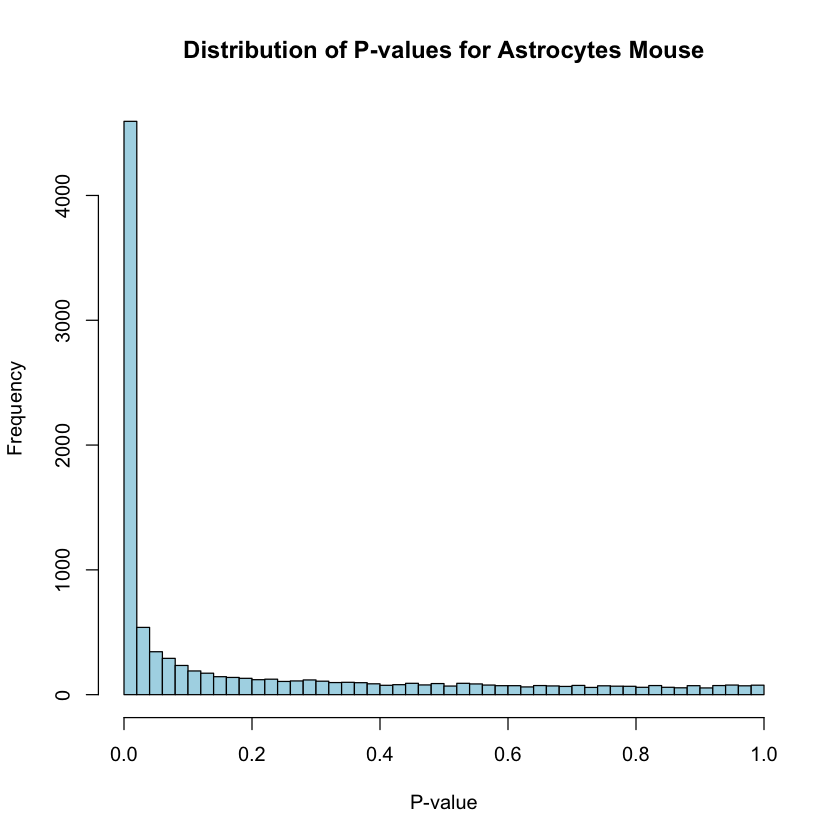

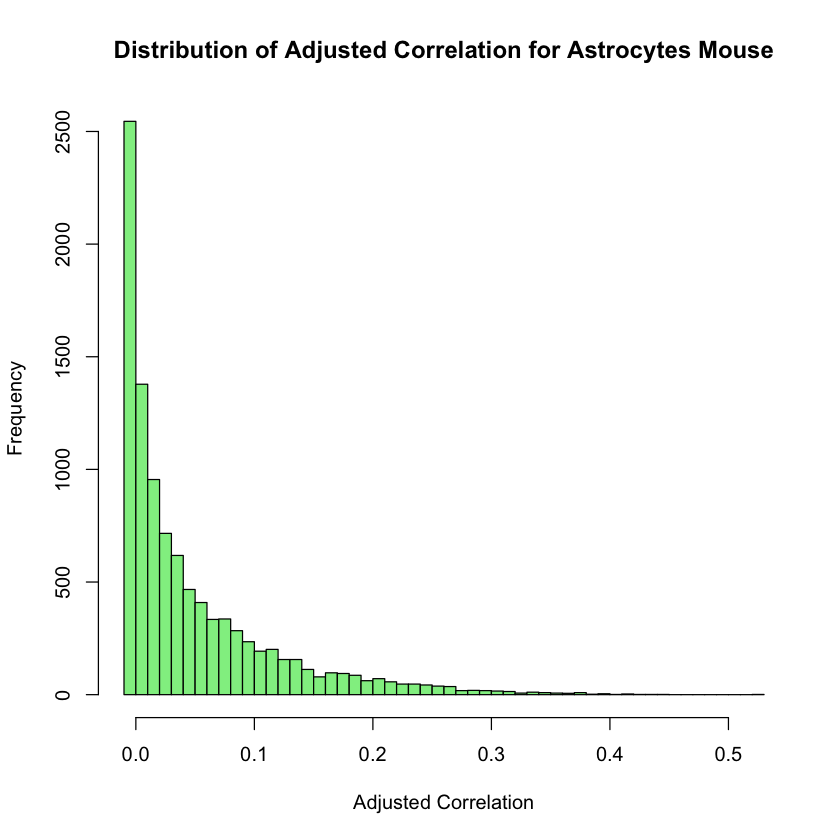

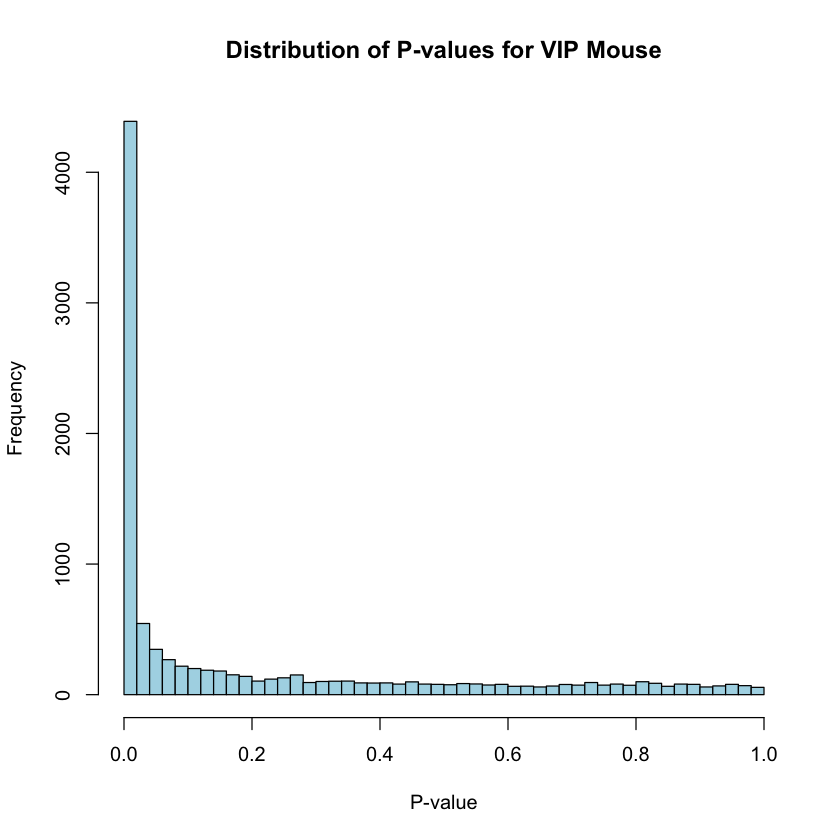

Significantly positively associated regions Astrocyte Mouse: 5385 
Significantly negatively associated regions Astrocyte Mouse: 0 
Significantly positively associated regions VIP Mouse: 5124 
Significantly negatively associated regions VIP Mouse: 0 
[1] "Most positively associated peak Astrocyte Mouse:"
                        peakId       pvalue correlation adjCorrelation
882 mm10:chr13:3633772-3634273 2.758371e-28   0.5312901      0.5283788
    adjusted_pvalue
882    2.758371e-24
[1] "Most negatively associated peak Astrocyte Mouse:"
                            peakId    pvalue correlation adjCorrelation
8624 mm10:chr7:112684857-112685358 0.3189689 0.006168826  -4.038015e-06
     adjusted_pvalue
8624       0.4278017
[1] "Most positively associated peak VIP Mouse:"
                            peakId       pvalue correlation adjCorrelation
7840 mm10:chr4:126309721-126310222 1.261365e-24   0.4798791      0.4766485
     adjusted_pvalue
7840    1.261365e-20
[1] "Most negatively associated

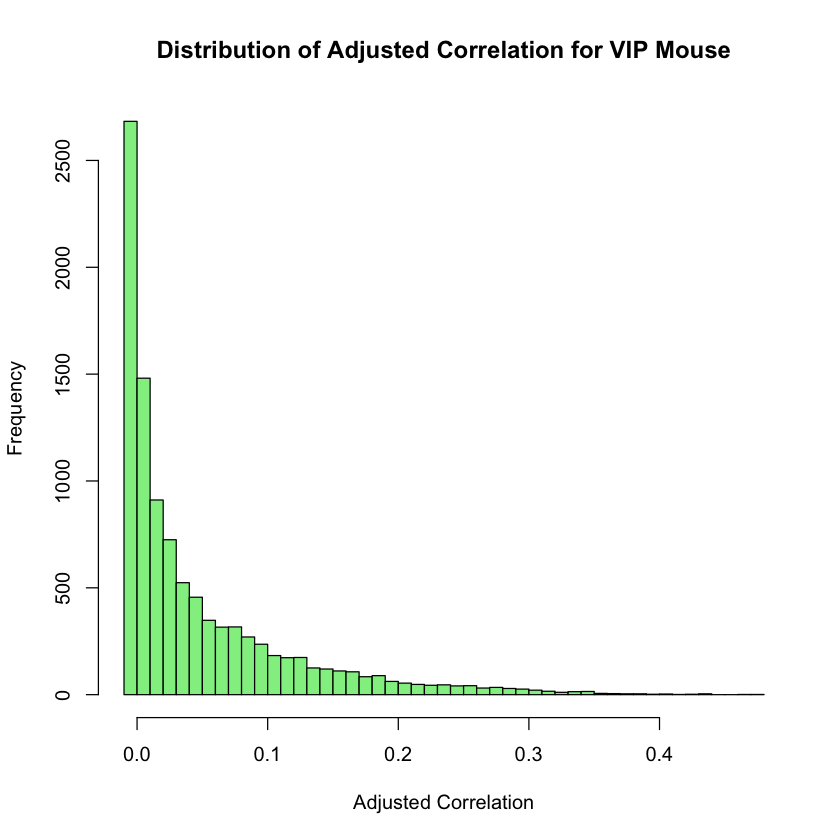

In [19]:
#Working on mouse peaks


#Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# P-value Histogram
hist(astrocyte_mouse$pvalue, breaks=50, main="Distribution of P-values for Astrocytes Mouse", xlab="P-value", col="lightblue")

# Adjusted Correlation Histogram
hist(astrocyte_mouse$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for Astrocytes Mouse", xlab="Adjusted Correlation", col="lightgreen")

#Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# P-value Histogram
hist(vip_mouse$pvalue, breaks=50, main="Distribution of P-values for VIP Mouse", xlab="P-value", col="lightblue")

# Adjusted Correlation Histogram
hist(vip_mouse$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for VIP Mouse", xlab="Adjusted Correlation", col="lightgreen")

astrocyte_mouse$adjusted_pvalue <- p.adjust(astrocyte_mouse$pvalue, method = "BH")

# Count significant regions at adjusted p-value <= 0.1
sig_pos <- sum(astrocyte_mouse$adjusted_pvalue <= 0.1 & astrocyte_mouse$adjCorrelation > 0)
sig_neg <- sum(astrocyte_mouse$adjusted_pvalue <= 0.1 & astrocyte_mouse$adjCorrelation < 0)

cat("Significantly positively associated regions Astrocyte Mouse:", sig_pos, "\n")
cat("Significantly negatively associated regions Astrocyte Mouse:", sig_neg, "\n")

#Performing p-value correction for multiple hypotheses

# Apply FDR correction - Bonferroni
vip_mouse$adjusted_pvalue <- p.adjust(vip_mouse$pvalue, method = "BH")

# Count significant regions at adjusted p-value <= 0.1
sig_pos <- sum(vip_mouse$adjusted_pvalue <= 0.1 & vip_mouse$adjCorrelation > 0)
sig_neg <- sum(vip_mouse$adjusted_pvalue <= 0.1 & vip_mouse$adjCorrelation < 0)

cat("Significantly positively associated regions VIP Mouse:", sig_pos, "\n")
cat("Significantly negatively associated regions VIP Mouse:", sig_neg, "\n")


# Filter the rows where adjCorrelation is positive and negative
positive_adj_corr <- astrocyte_mouse[astrocyte_mouse$adjCorrelation > 0, ]
negative_adj_corr <- astrocyte_mouse[astrocyte_mouse$adjCorrelation < 0, ]

# Find the row with the lowest p-value among the positive adjCorrelation
most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# Find the row with the lowest p-value among the negative adjCorrelation
most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# Print the results
print("Most positively associated peak Astrocyte Mouse:")
print(most_pos_assoc_peak)

print("Most negatively associated peak Astrocyte Mouse:")
print(most_neg_assoc_peak)


# Filter the rows where adjCorrelation is positive and negative
positive_adj_corr <- vip_mouse[vip_mouse$adjCorrelation > 0, ]
negative_adj_corr <- vip_mouse[vip_mouse$adjCorrelation < 0, ]

# Find the row with the lowest p-value among the positive adjCorrelation
most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# Find the row with the lowest p-value among the negative adjCorrelation
most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# Print the results
print("Most positively associated peak VIP Mouse:")
print(most_pos_assoc_peak)

print("Most negatively associated peak VIP Mouse:")
print(most_neg_assoc_peak)

#GREAT ANALYSIS
top_200_positiveAstro <- astrocyte_mouse[astrocyte_mouse$adjCorrelation > 0, ][order(astrocyte_mouse$pvalue[astrocyte_mouse$adjCorrelation > 0]), ][1:200, ]
top_200_negativeAstro <- astrocyte_mouse[astrocyte_mouse$adjCorrelation < 0, ][order(astrocyte_mouse$pvalue[astrocyte_mouse$adjCorrelation < 0]), ][1:200, ]

extract_bed_info <- function(peakId) {
  split_info <- strsplit(peakId, ":|-")[[1]] # Split by : and -
  chr <- split_info[2]   # Chromosome
  start <- split_info[3] # Start position
  stop <- split_info[4]  # End position
  return(c(chr, start, stop))
}

# Apply this function to both positive and negative data
top_200_positive_bedAstro <- t(apply(top_200_positiveAstro, 1, function(x) extract_bed_info(x['peakId'])))
top_200_negative_bedAstro <- t(apply(top_200_negativeAstro, 1, function(x) extract_bed_info(x['peakId'])))

# Add peakId to the BED information
top_200_positive_bedAstro <- data.frame(top_200_positive_bedAstro, peakId = top_200_positiveAstro$peakId)
top_200_negative_bedAstro <- data.frame(top_200_negative_bedAstro, peakId = top_200_negativeAstro$peakId)

# Rename the columns to match BED format
colnames(top_200_positive_bedAstro) <- c("chr", "start", "stop", "peakId")
colnames(top_200_negative_bedAstro) <- c("chr", "start", "stop", "peakId")

# Write to BED files
write.table(top_200_positive_bedAstro, file = "bed_results/mouse/top_200_positive_peaks_astro_mouse.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

write.table(top_200_negative_bedAstro, file = "bed_results/mouse/top_200_negative_peaks_astro_mouse.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# Extract all peaks
all_peaks_bedAstro <- t(apply(astrocyte_mouse, 1, function(x) extract_bed_info(x['peakId'])))
all_peaks_bedAstro <- data.frame(all_peaks_bedAstro, peakId = astrocyte_mouse$peakId)

# Rename columns for BED format
colnames(all_peaks_bedAstro) <- c("chr", "start", "stop", "peakId")

# Write to a BED file for all peaks
write.table(all_peaks_bedAstro, file = "bed_results/mouse/all_peaks_cell_type_astro_mouse.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

top_200_positiveVIP <- vip_mouse[vip_mouse$adjCorrelation > 0, ][order(vip_mouse$pvalue[vip_mouse$adjCorrelation > 0]), ][1:200, ]
top_200_negativeVIP <- vip_mouse[vip_mouse$adjCorrelation < 0, ][order(vip_mouse$pvalue[vip_mouse$adjCorrelation < 0]), ][1:200, ]

top_200_positive_bedVIP <- t(apply(top_200_positiveVIP, 1, function(x) extract_bed_info(x['peakId'])))
top_200_negative_bedVIP <- t(apply(top_200_negativeVIP, 1, function(x) extract_bed_info(x['peakId'])))

# Add peakId to the BED information
top_200_positive_bedVIP <- data.frame(top_200_positive_bedVIP, peakId = top_200_positiveVIP$peakId)
top_200_negative_bedVIP <- data.frame(top_200_negative_bedVIP, peakId = top_200_negativeVIP$peakId)

# Rename the columns to match BED format
colnames(top_200_positive_bedVIP) <- c("chr", "start", "stop", "peakId")
colnames(top_200_negative_bedVIP) <- c("chr", "start", "stop", "peakId")

# Write to BED files
write.table(top_200_positive_bedVIP, file = "bed_results/mouse/top_200_positive_peaks_vip_mouse.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(top_200_negative_bedVIP, file = "bed_results/mouse/top_200_negative_peaks_vip_mouse.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# Extract all peaks
all_peaks_bedVIP <- t(apply(vip_mouse, 1, function(x) extract_bed_info(x['peakId'])))
all_peaks_bedVIP <- data.frame(all_peaks_bedVIP, peakId = vip_mouse$peakId)

# Rename columns for BED format
colnames(all_peaks_bedVIP) <- c("chr", "start", "stop", "peakId")

# Write to a BED file for all peaks
write.table(all_peaks_bedVIP, file = "bed_results/mouse/all_peaks_cell_type_vip_mouse.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)


Below is the template for old analysis

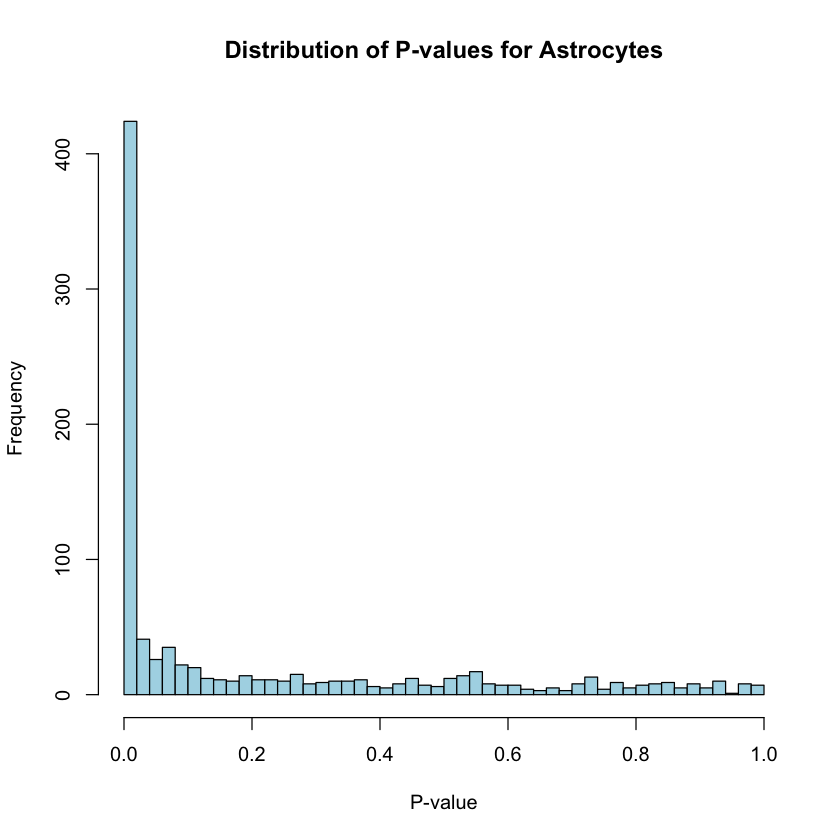

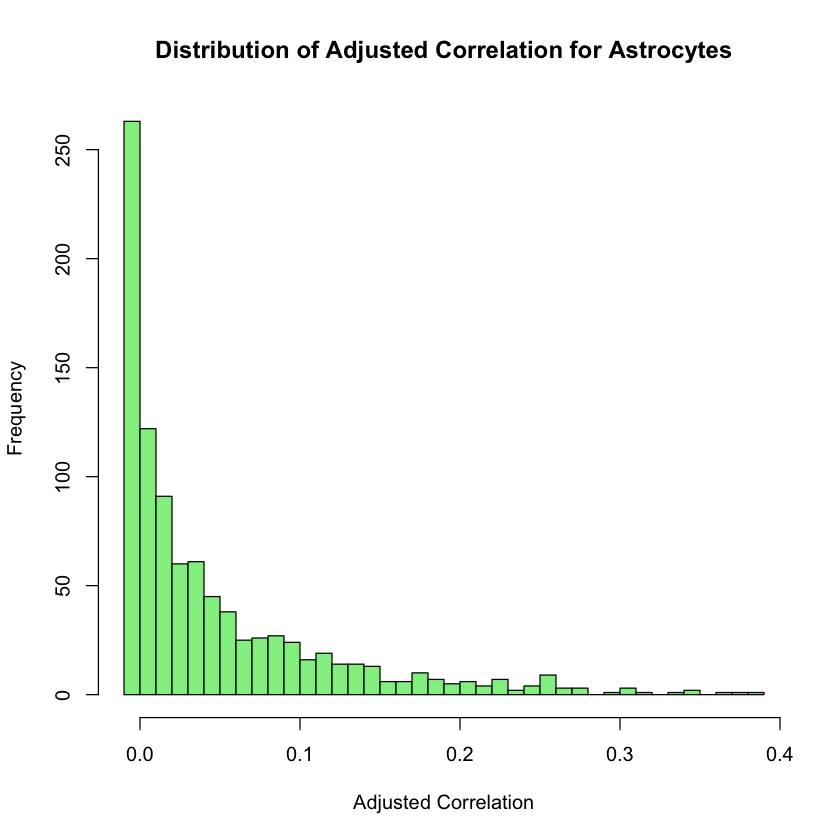

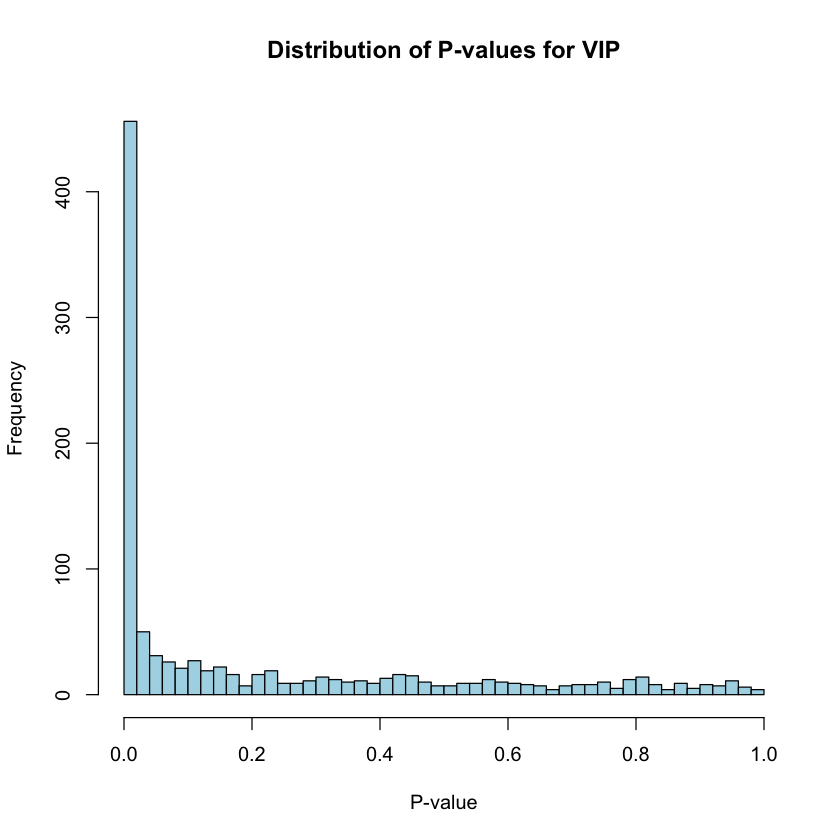

Significantly positively associated regions Astrocyte: 484 
Significantly negatively associated regions Astrocyte: 0 
Significantly positively associated regions VIP: 520 
Significantly negatively associated regions VIP: 0 
[1] "Most positively associated peak Astrocyte:"
                          peakId       pvalue correlation adjCorrelation
1866 mm10:chr7:73201194-73201695 8.389867e-19   0.3864211      0.3826101
     adjusted_pvalue
1866    7.894865e-16
[1] "Most negatively associated peak Astrocyte:"
                            peakId   pvalue correlation adjCorrelation
6605 mm10:chr2:178413012-178413513 0.318999 0.006168063  -4.806409e-06
     adjusted_pvalue
6605       0.4420884


Warning message:
"Removed 43 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 17 rows containing missing values or values outside the scale range
(`geom_point()`)."


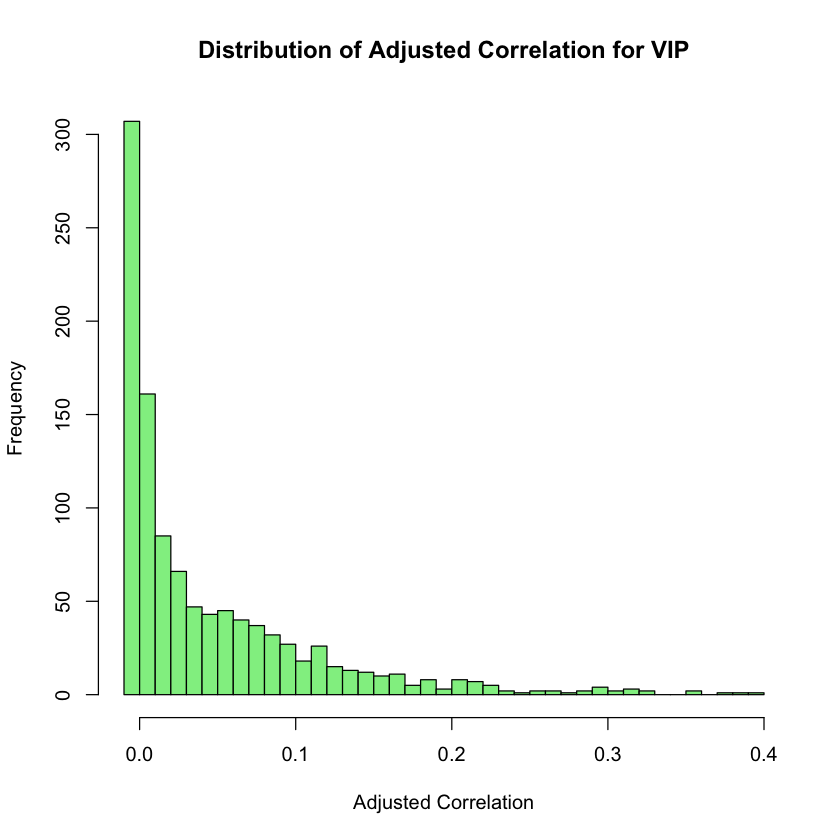

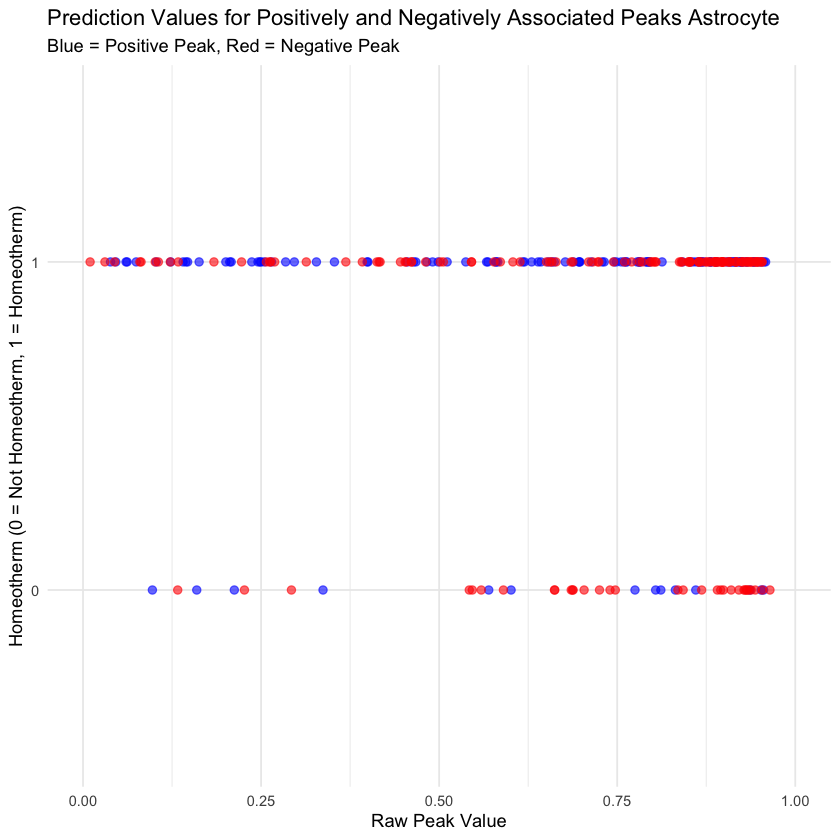

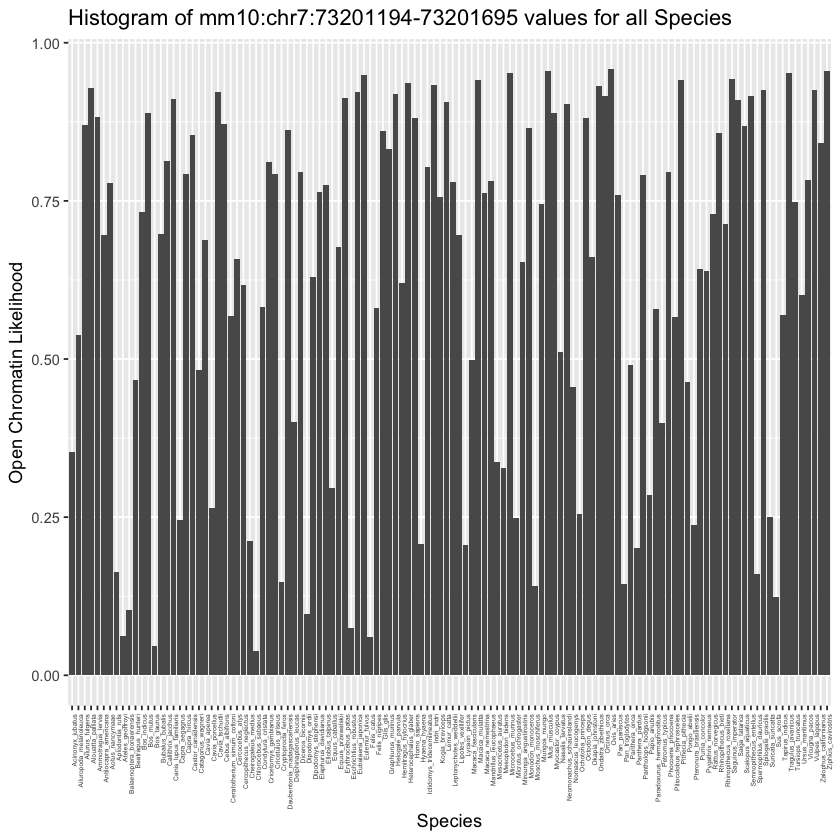

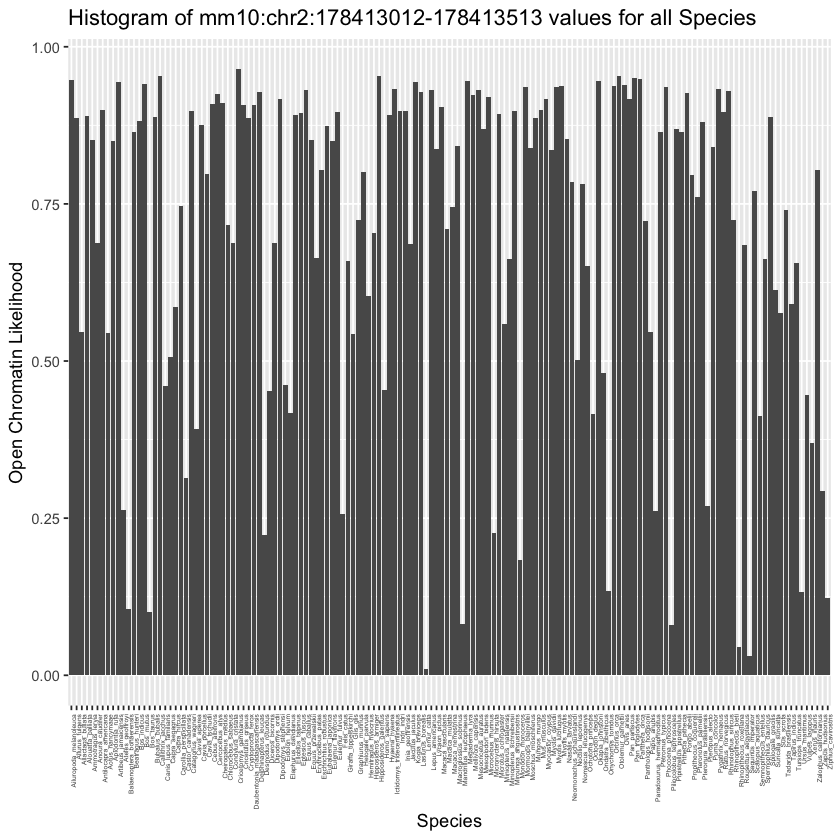

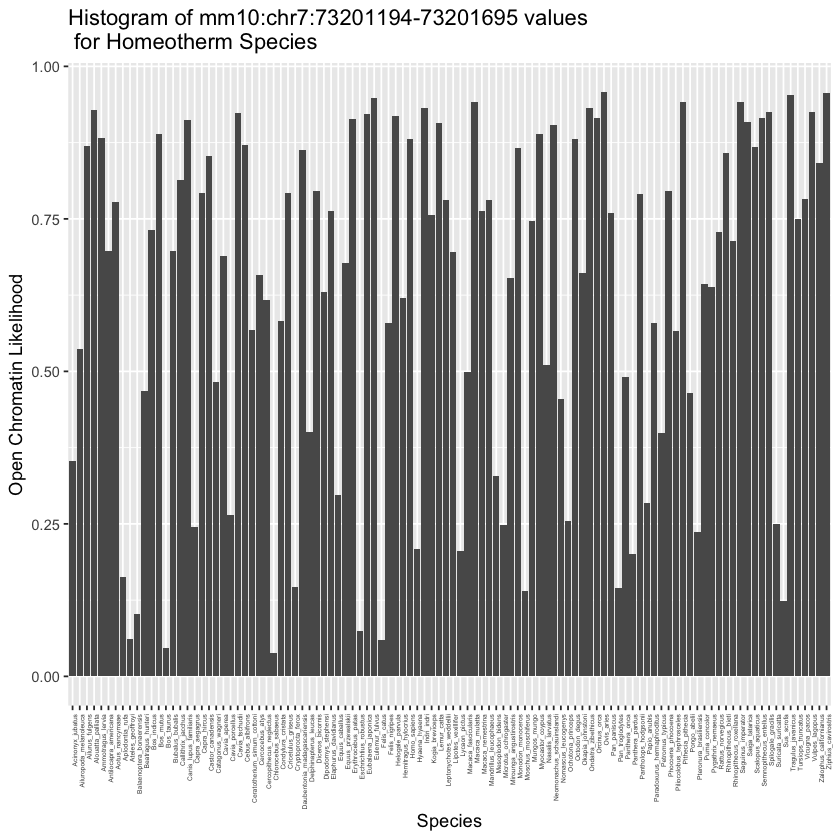

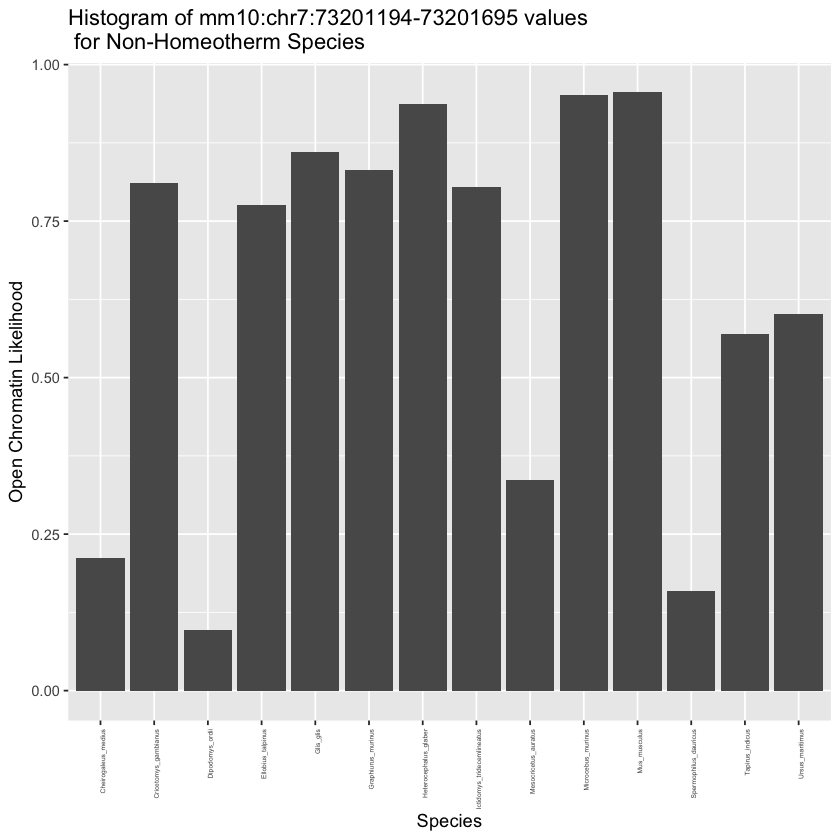

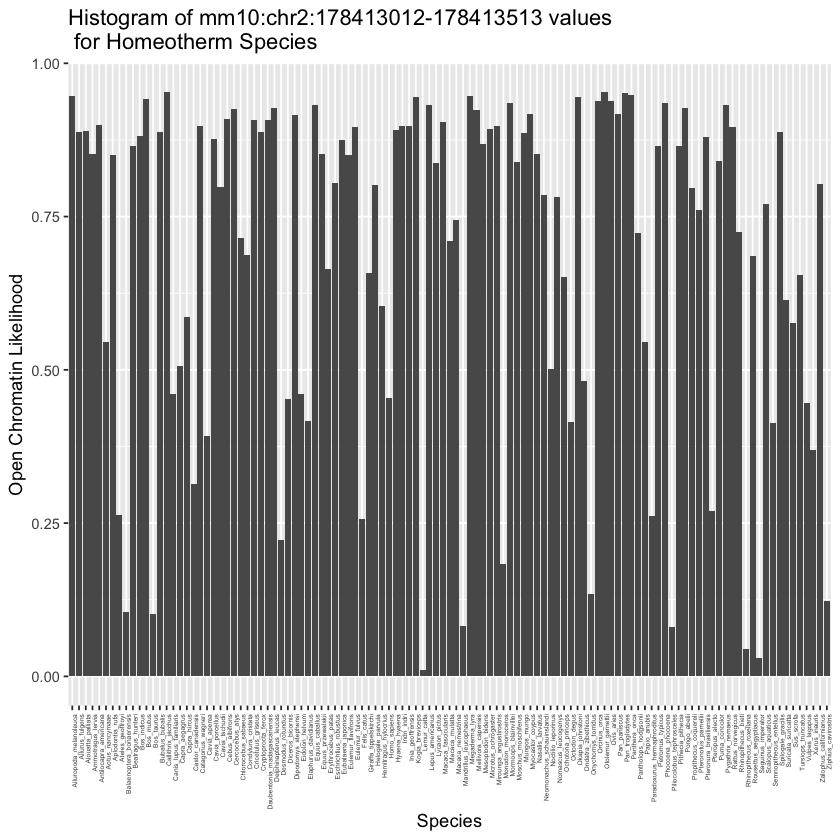

[1] "Most positively associated peak VIP:"
                            peakId       pvalue correlation adjCorrelation
3951 mm10:chr5:148552290-148552791 1.500252e-19   0.3992839      0.3955528
     adjusted_pvalue
3951    1.585767e-16
[1] "Most negatively associated peak VIP:"
                           peakId    pvalue correlation adjCorrelation
789 mm10:chr9:108052844-108053345 0.3190583 0.006166555  -6.323041e-06
    adjusted_pvalue
789        0.448926


Warning message:
"Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`)."


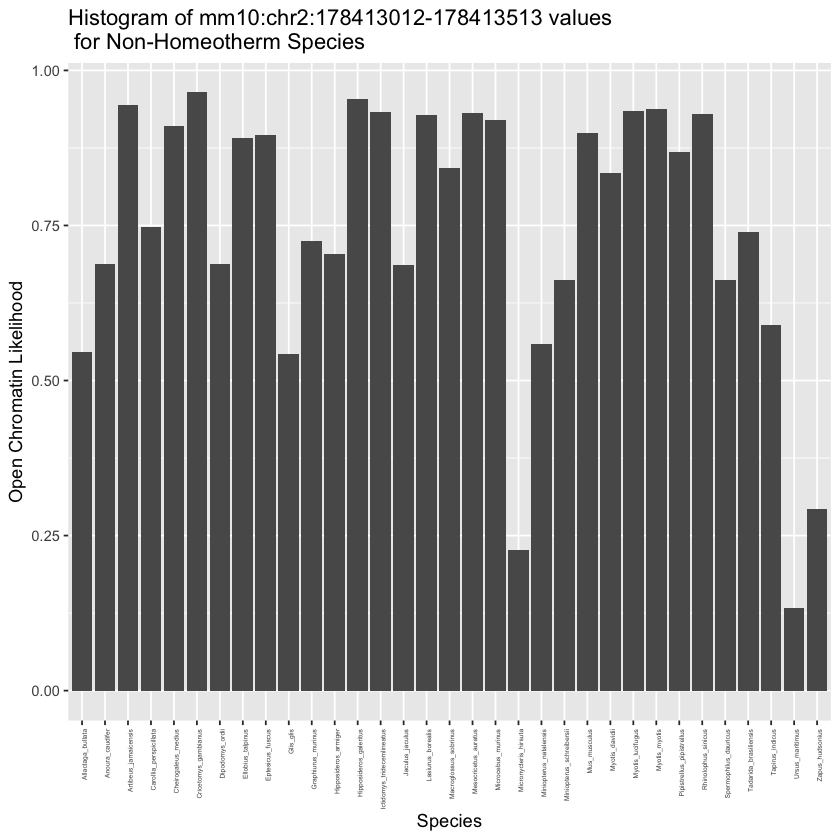

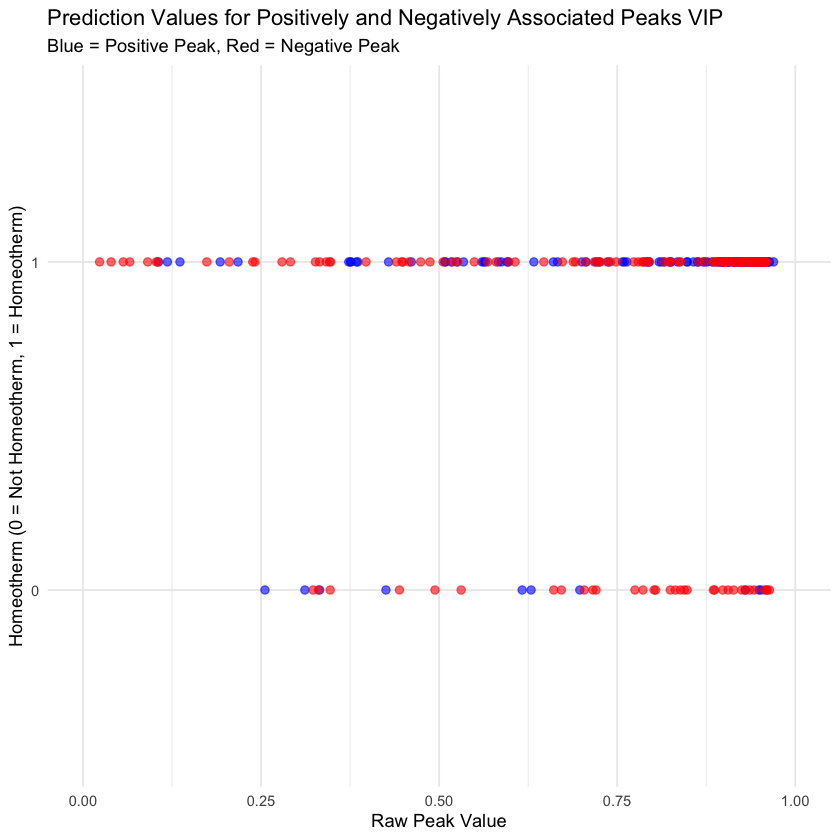

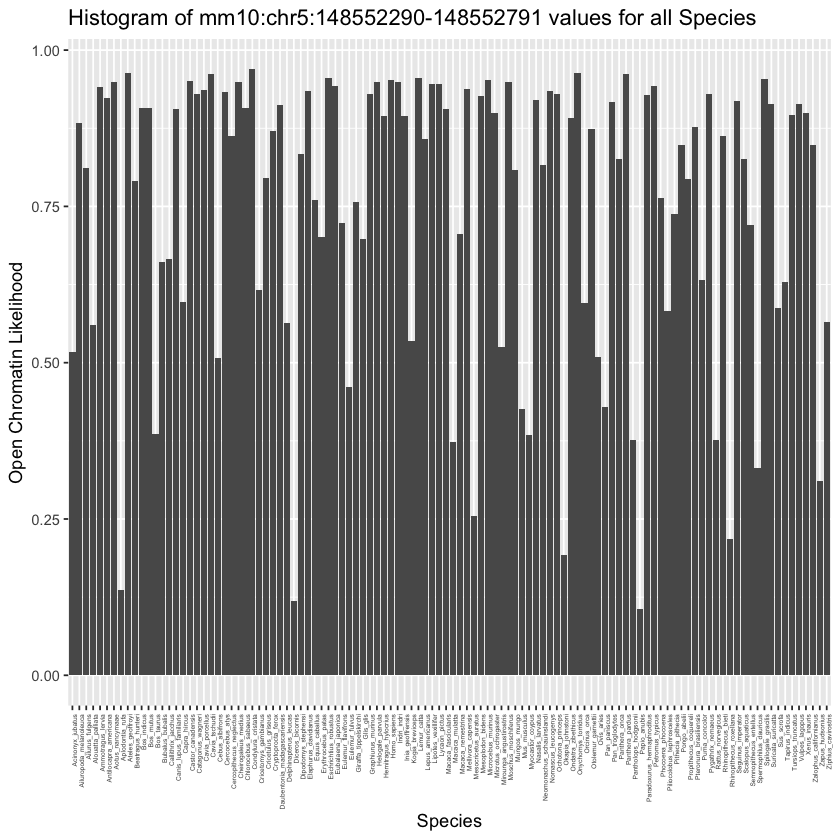

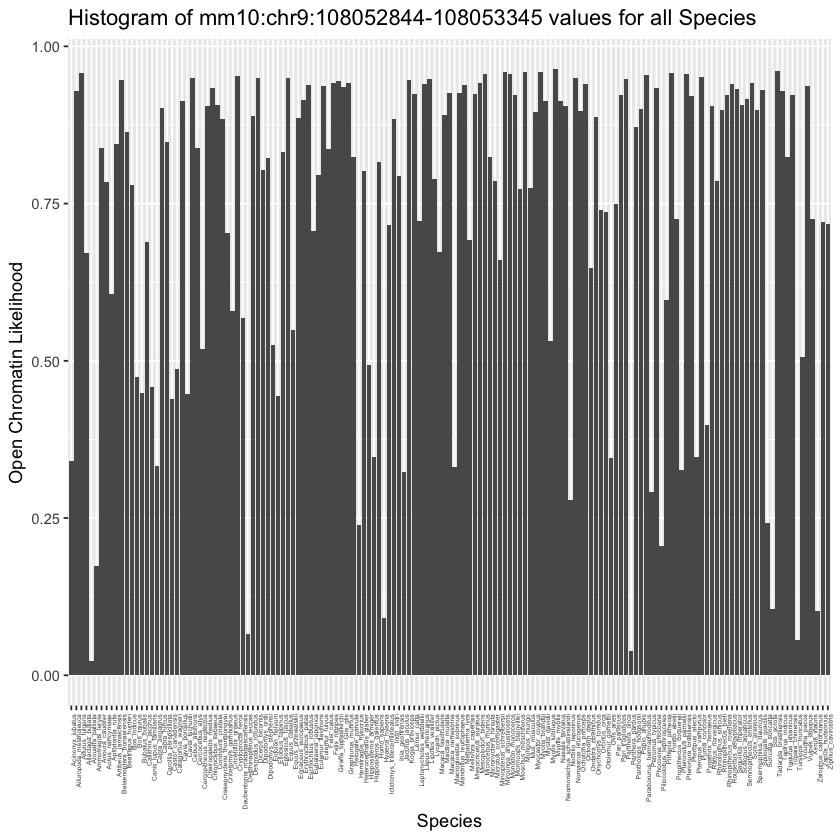

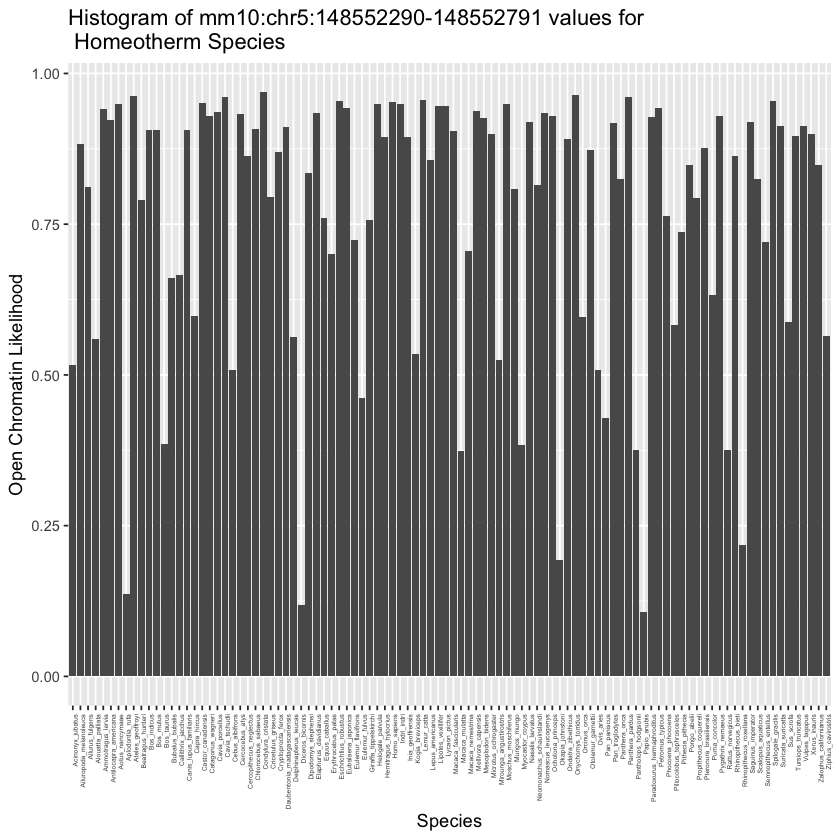

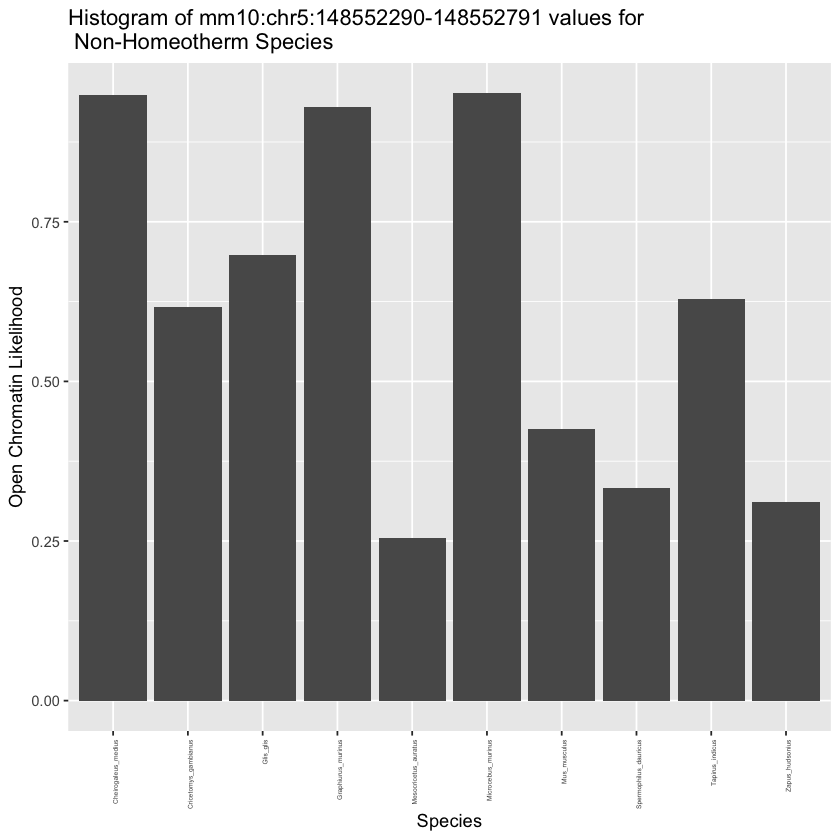

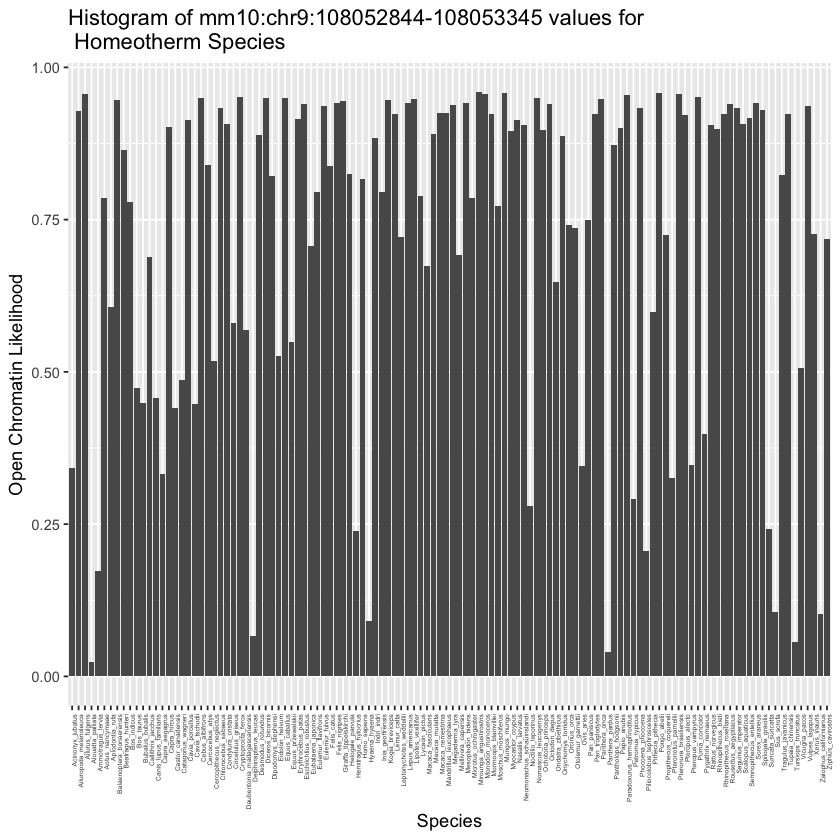

[1] "DOING GREAT ANALYSIS"


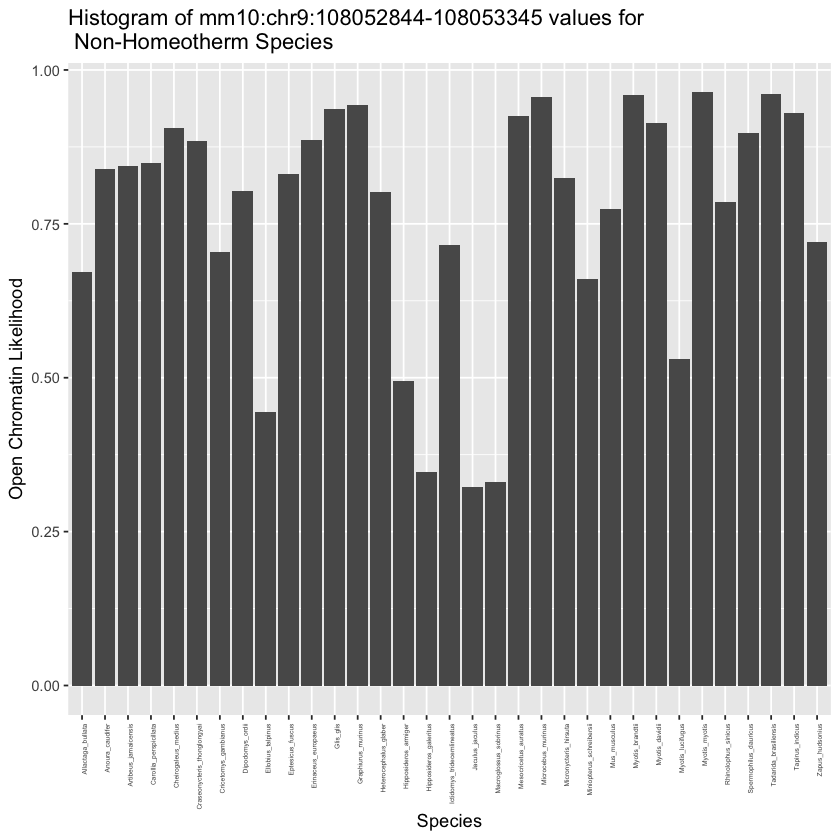

In [ ]:
# #THIS IS FOR MOUSE GENOME mm10

# astrocyte_overlap_filtered <- astrocyte_overlap[!astrocyte_overlap$peakId %in% astrocyte_10000$peakId, ]
# vip_overlap_filtered <- vip_overlap[!vip_overlap$peakId %in% vip_10000$peakId, ]

# astrocyte_combined <- rbind(astrocyte_10000, astrocyte_overlap_filtered)
# vip_combined <- rbind(vip_10000, vip_overlap_filtered)


# #FILTER IT HERE
# astrocyteMouse <- astrocyte_combined[grep("^mm10", astrocyte_combined$peakId), ]
# vipMouse <- vip_combined[grep("^mm10", vip_combined$peakId), ]



# #Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# # P-value Histogram
# hist(astrocyteMouse$pvalue, breaks=50, main="Distribution of P-values for Astrocytes", xlab="P-value", col="lightblue")

# # Adjusted Correlation Histogram
# hist(astrocyteMouse$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for Astrocytes", xlab="Adjusted Correlation", col="lightgreen")


# #Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# # P-value Histogram
# hist(vipMouse$pvalue, breaks=50, main="Distribution of P-values for VIP", xlab="P-value", col="lightblue")

# # Adjusted Correlation Histogram
# hist(vipMouse$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for VIP", xlab="Adjusted Correlation", col="lightgreen")

# astrocyteMouse$adjusted_pvalue <- p.adjust(astrocyteMouse$pvalue, method = "BH")

# # Count significant regions at adjusted p-value <= 0.1
# sig_pos <- sum(astrocyteMouse$adjusted_pvalue <= 0.1 & astrocyteMouse$adjCorrelation > 0)
# sig_neg <- sum(astrocyteMouse$adjusted_pvalue <= 0.1 & astrocyteMouse$adjCorrelation < 0)

# cat("Significantly positively associated regions Astrocyte:", sig_pos, "\n")
# cat("Significantly negatively associated regions Astrocyte:", sig_neg, "\n")

# #Performing p-value correction for multiple hypotheses

# # Apply FDR correction - Bonferroni
# vipMouse$adjusted_pvalue <- p.adjust(vipMouse$pvalue, method = "BH")

# # Count significant regions at adjusted p-value <= 0.1
# sig_pos <- sum(vipMouse$adjusted_pvalue <= 0.1 & vipMouse$adjCorrelation > 0)
# sig_neg <- sum(vipMouse$adjusted_pvalue <= 0.1 & vipMouse$adjCorrelation < 0)

# cat("Significantly positively associated regions VIP:", sig_pos, "\n")
# cat("Significantly negatively associated regions VIP:", sig_neg, "\n")

# # For homeotherm species print peak value
# homeotherm_species <- astrocytePredictionsNames$Species[astrocytePredictionsNames$Homeotherm == 1]
# nonhomeotherm_species <- astrocytePredictionsNames$Species[astrocytePredictionsNames$Homeotherm == 0]

# # Filter the rows where adjCorrelation is positive and negative
# positive_adj_corr <- astrocyteMouse[astrocyteMouse$adjCorrelation > 0, ]
# negative_adj_corr <- astrocyteMouse[astrocyteMouse$adjCorrelation < 0, ]

# # Find the row with the lowest p-value among the positive adjCorrelation
# most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# # Find the row with the lowest p-value among the negative adjCorrelation
# most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# # Print the results
# print("Most positively associated peak Astrocyte:")
# print(most_pos_assoc_peak)

# print("Most negatively associated peak Astrocyte:")
# print(most_neg_assoc_peak)

# astrocyte_peaks <- c(most_pos_assoc_peak$peakId, most_neg_assoc_peak$peakId)

# indices <- match(astrocyte_peaks, colnames(astrocytePredictions))
# subset_astrocyte <- astrocytePredictions[,indices]
# subset_astrocyte$Homeotherm <- astrocytePredictionsNames$Homeotherm

# colnames(subset_astrocyte) <- c("Positive_Peak", "Negative_Peak", "Homeotherm")
# subset_astrocyte$Homeotherm <- as.factor(subset_astrocyte$Homeotherm)
# subset_astrocyte$Positive_Peak <- as.numeric(subset_astrocyte$Positive_Peak)
# subset_astrocyte$Negative_Peak <- as.numeric(subset_astrocyte$Negative_Peak)

# plot <- ggplot(subset_astrocyte, aes(x = Positive_Peak, y = Homeotherm)) +
#   geom_point(color = "blue", alpha = 0.6, size = 2) +
#   geom_point(aes(x = Negative_Peak), color = "red", alpha = 0.6, size = 2) +
#   scale_x_continuous(limits = c(0, 1), name = "Raw Peak Value") +
#   scale_y_discrete(name = "Homeotherm (0 = Not Homeotherm, 1 = Homeotherm)") +
#   labs(title = "Prediction Values for Positively and Negatively Associated Peaks Astrocyte",
#        subtitle = "Blue = Positive Peak, Red = Negative Peak") +
#   theme_minimal()

# print(plot)

# # For specific peak print magnitude across all species
# for (peak in astrocyte_peaks){
#     idx <- match(peak, colnames(astrocytePredictions))
#     small_astrocytePredictions <- astrocytePredictions[idx]
#     small_astrocytePredictions$Species <- rownames(small_astrocytePredictions)
#     colnames(small_astrocytePredictions) <- c("Value", "Species")
#     small_astrocytePredictions$Value <- as.numeric(small_astrocytePredictions$Value)
#     small_astrocytePredictions <- small_astrocytePredictions[small_astrocytePredictions$Value >= 0,]
#     my_plot <- ggplot(small_astrocytePredictions, aes(x = Species, y = Value)) +
#                 geom_bar(stat = "identity") +
#                 theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
#                 labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for all Species"))
#     print(my_plot)
# }

# for (peak in astrocyte_peaks){
#     idx <- match(peak, colnames(astrocytePredictions))
#     small_astrocytePredictions <- astrocytePredictions[idx]
#     small_astrocytePredictions$Species <- rownames(small_astrocytePredictions)
#     colnames(small_astrocytePredictions) <- c("Value", "Species")
#     small_astrocytePredictions$Value <- as.numeric(small_astrocytePredictions$Value)
#     small_astrocytePredictions <- small_astrocytePredictions[small_astrocytePredictions$Value >= 0,]
#     small_astrocytePredictions_homeo <- small_astrocytePredictions[small_astrocytePredictions$Species %in% homeotherm_species,]
#     my_plot_homeo <- ggplot(small_astrocytePredictions_homeo, aes(x = Species, y = Value)) +
#                         geom_bar(stat = "identity") +
#                         theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
#                         labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values \n for Homeotherm Species"))
#     print(my_plot_homeo)
#     small_astrocytePredictions_nonhomeo <- small_astrocytePredictions[small_astrocytePredictions$Species %in% nonhomeotherm_species,]
#     my_plot_nonhomeo <- ggplot(small_astrocytePredictions_nonhomeo, aes(x = Species, y = Value)) +
#                         geom_bar(stat = "identity") +
#                         theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
#                         labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values \n for Non-Homeotherm Species"))
#     print(my_plot_nonhomeo)
# }

# # Filter the rows where adjCorrelation is positive and negative
# positive_adj_corr <- vipMouse[vipMouse$adjCorrelation > 0, ]
# negative_adj_corr <- vipMouse[vipMouse$adjCorrelation < 0, ]

# # Find the row with the lowest p-value among the positive adjCorrelation
# most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# # Find the row with the lowest p-value among the negative adjCorrelation
# most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# # Print the results
# print("Most positively associated peak VIP:")
# print(most_pos_assoc_peak)

# print("Most negatively associated peak VIP:")
# print(most_neg_assoc_peak)

# vip_peaks <- c(most_pos_assoc_peak$peakId, most_neg_assoc_peak$peakId)

# indices <- match(vip_peaks, colnames(vipPredictions))
# subset_vip <- vipPredictions[,indices]
# subset_vip$Homeotherm <- vipPredictionsNames$Homeotherm

# colnames(subset_vip) <- c("Positive_Peak", "Negative_Peak", "Homeotherm")
# subset_vip$Homeotherm <- as.factor(subset_vip$Homeotherm)
# subset_vip$Positive_Peak <- as.numeric(subset_vip$Positive_Peak)
# subset_vip$Negative_Peak <- as.numeric(subset_vip$Negative_Peak)

# plot <- ggplot(subset_vip, aes(x = Positive_Peak, y = Homeotherm)) +
#   geom_point(color = "blue", alpha = 0.6, size = 2) +
#   geom_point(aes(x = Negative_Peak), color = "red", alpha = 0.6, size = 2) +
#   scale_x_continuous(limits = c(0, 1), name = "Raw Peak Value") +
#   scale_y_discrete(name = "Homeotherm (0 = Not Homeotherm, 1 = Homeotherm)") +
#   labs(title = "Prediction Values for Positively and Negatively Associated Peaks VIP",
#        subtitle = "Blue = Positive Peak, Red = Negative Peak") +
#   theme_minimal()

# print(plot)

# for (peak in vip_peaks){
#     idx <- match(peak, colnames(vipPredictions))
#     small_vipPredictions <- vipPredictions[idx]
#     small_vipPredictions$Species <- rownames(small_vipPredictions)
#     colnames(small_vipPredictions) <- c("Value", "Species")
#     small_vipPredictions$Value <- as.numeric(small_vipPredictions$Value)
#     small_vipPredictions <- small_vipPredictions[small_vipPredictions$Value >= 0,]
#     my_plot <- ggplot(small_vipPredictions, aes(x = Species, y = Value)) +
#                 geom_bar(stat = "identity") +
#                 theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
#                 labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for all Species"))
#     print(my_plot)
# }

# for (peak in vip_peaks){
#     idx <- match(peak, colnames(vipPredictions))
#     small_vipPredictions <- vipPredictions[idx]
#     small_vipPredictions$Species <- rownames(small_vipPredictions)
#     colnames(small_vipPredictions) <- c("Value", "Species")
#     small_vipPredictions$Value <- as.numeric(small_vipPredictions$Value)
#     small_vipPredictions <- small_vipPredictions[small_vipPredictions$Value >= 0,]
#     small_vipPredictions_homeo <- small_vipPredictions[small_vipPredictions$Species %in% homeotherm_species,]
#     my_plot_homeo <- ggplot(small_vipPredictions_homeo, aes(x = Species, y = Value)) +
#                         geom_bar(stat = "identity") +
#                         theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
#                         labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for \n Homeotherm Species"))
#     print(my_plot_homeo)
#     small_vipPredictions_nonhomeo <- small_vipPredictions[small_vipPredictions$Species %in% nonhomeotherm_species,]
#     my_plot_nonhomeo <- ggplot(small_vipPredictions_nonhomeo, aes(x = Species, y = Value)) +
#                         geom_bar(stat = "identity") +
#                         theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
#                         labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for \n Non-Homeotherm Species"))
#     print(my_plot_nonhomeo)
# }

# print("DOING GREAT ANALYSIS")
# #GREAT ANALYSIS
# top_200_positiveAstro <- astrocyteMouse[astrocyteMouse$adjCorrelation > 0, ][order(astrocyteMouse$pvalue[astrocyteMouse$adjCorrelation > 0]), ][1:200, ]
# top_200_negativeAstro <- astrocyteMouse[astrocyteMouse$adjCorrelation < 0, ][order(astrocyteMouse$pvalue[astrocyteMouse$adjCorrelation < 0]), ][1:200, ]

# extract_bed_info <- function(peakId) {
#   split_info <- strsplit(peakId, ":|-")[[1]] # Split by : and -
#   chr <- split_info[2]   # Chromosome
#   start <- split_info[3] # Start position
#   stop <- split_info[4]  # End position
#   return(c(chr, start, stop))
# }

# # Apply this function to both positive and negative data
# top_200_positive_bedAstro <- t(apply(top_200_positiveAstro, 1, function(x) extract_bed_info(x['peakId'])))
# top_200_negative_bedAstro <- t(apply(top_200_negativeAstro, 1, function(x) extract_bed_info(x['peakId'])))

# # Add peakId to the BED information
# top_200_positive_bedAstro <- data.frame(top_200_positive_bedAstro, peakId = top_200_positiveAstro$peakId)
# top_200_negative_bedAstro <- data.frame(top_200_negative_bedAstro, peakId = top_200_negativeAstro$peakId)

# # Rename the columns to match BED format
# colnames(top_200_positive_bedAstro) <- c("chr", "start", "stop", "peakId")
# colnames(top_200_negative_bedAstro) <- c("chr", "start", "stop", "peakId")

# # Write to BED files
# write.table(top_200_positive_bedAstro, file = "Bed_Files_Mouse/top_200_positive_peaksAstro.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# write.table(top_200_negative_bedAstro, file = "Bed_Files_Mouse/top_200_negative_peaksAstro.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# # Extract all peaks
# all_peaks_bedAstro <- t(apply(astrocyteMouse, 1, function(x) extract_bed_info(x['peakId'])))
# all_peaks_bedAstro <- data.frame(all_peaks_bedAstro, peakId = astrocyteMouse$peakId)

# # Rename columns for BED format
# colnames(all_peaks_bedAstro) <- c("chr", "start", "stop", "peakId")

# # Write to a BED file for all peaks
# write.table(all_peaks_bedAstro, file = "Bed_Files_Mouse/all_peaks_cell_typeAstro.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# top_200_positiveVIP <- vipMouse[vipMouse$adjCorrelation > 0, ][order(vipMouse$pvalue[vipMouse$adjCorrelation > 0]), ][1:200, ]
# top_200_negativeVIP <- vipMouse[vipMouse$adjCorrelation < 0, ][order(vipMouse$pvalue[vipMouse$adjCorrelation < 0]), ][1:200, ]

# top_200_positive_bedVIP <- t(apply(top_200_positiveVIP, 1, function(x) extract_bed_info(x['peakId'])))
# top_200_negative_bedVIP <- t(apply(top_200_negativeVIP, 1, function(x) extract_bed_info(x['peakId'])))

# # Add peakId to the BED information
# top_200_positive_bedVIP <- data.frame(top_200_positive_bedVIP, peakId = top_200_positiveVIP$peakId)
# top_200_negative_bedVIP <- data.frame(top_200_negative_bedVIP, peakId = top_200_negativeVIP$peakId)

# # Rename the columns to match BED format
# colnames(top_200_positive_bedVIP) <- c("chr", "start", "stop", "peakId")
# colnames(top_200_negative_bedVIP) <- c("chr", "start", "stop", "peakId")

# # Write to BED files
# write.table(top_200_positive_bedVIP, file = "Bed_Files_Mouse/top_200_positive_peaksVIP.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
# write.table(top_200_negative_bedVIP, file = "Bed_Files_Mouse/top_200_negative_peaksVIP.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# # Extract all peaks
# all_peaks_bedVIP <- t(apply(vipMouse, 1, function(x) extract_bed_info(x['peakId'])))
# all_peaks_bedVIP <- data.frame(all_peaks_bedVIP, peakId = vipMouse$peakId)

# # Rename columns for BED format
# colnames(all_peaks_bedVIP) <- c("chr", "start", "stop", "peakId")

# # Write to a BED file for all peaks
# write.table(all_peaks_bedVIP, file = "Bed_Files_Mouse/all_peaks_cell_typeVIP.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)